# Imports & Configs

In [1]:
# %pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE, SelectFromModel
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import os
import glob
from tqdm import tqdm
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [3]:
# folder_path = 'C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\'

In [4]:
# file_paths = glob.glob(folder_path + '/*.csv')

In [5]:
# train = pd.DataFrame()

In [6]:
# n_file_limit = 1
# for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
#     if n_file_limit <= 0: break
#     n_file_limit -= 1
#     df = pd.read_csv(file_path)
#     train = pd.concat([train, df], ignore_index=True)

# Data Preprocessing & EDA

In [7]:
train = pd.read_csv("C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
train

flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0            0.000000           0.00           1.00    102.20   204.980158   
1            0.000000          54.00           6.00     64.00     0.000000   
2            0.000000          54.00           6.00     64.00     0.000000   
3            3.394034         210.60           6.00     64.00     1.144677   
4            0.000000          54.00           6.00     64.00     0.992022   
...               ...            ...            ...       ...          ...   
451493       0.137860       40275.00          17.00     64.00  8775.835347   
451494       4.749410         108.00           6.00     64.00     0.421105   
451495       0.006198           2.96           1.04     72.91     5.956262   
451496       0.086669       38225.00          17.00     64.00  8818.813708   
451497       0.000000          54.00           6.00     64.00    87.821661   

              Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0        204.980158    0.0              0.0              0.0              0.0   
1          0.000000    0.0              1.0              0.0              1.0   
2          0.000000    0.0              0.0              1.0              0.0   
3          1.144677    0.0              0.0              1.0              0.0   
4          0.992022    0.0              1.0              0.0              1.0   
...             ...    ...              ...              ...              ...   
451493  8775.835347    0.0              0.0              0.0              0.0   
451494     0.421105    0.0              0.0              0.0              0.0   
451495     5.956262    0.0              0.0              0.0              0.0   
451496  8818.813708    0.0              0.0              0.0              0.0   
451497    87.821661    0.0              0.0              1.0              0.0   

        ...       Std  Tot size           IAT  Number   Magnitue   Radius  \
0       ...  0.000000      42.0  8.315011e+07     9.5   9.165151  0.00000   
1       ...  0.000000      54.0  8.334862e+07     9.5  10.392305  0.00000   
2       ...  0.000000      54.0  8.308927e+07     9.5  10.392305  0.00000   
3       ...  0.000000      54.0  8.336215e+07     9.5  10.392305  0.00000   
4       ...  0.000000      54.0  8.334381e+07     9.5  10.392305  0.00000   
...     ...       ...       ...           ...     ...        ...      ...   
451493  ...  0.000000      50.0  8.310664e+07     9.5  10.000000  0.00000   
451494  ...  0.000000      54.0  8.295157e+07     9.5  10.392305  0.00000   
451495  ...  0.401681      42.5  8.314935e+07     9.5   9.179101  0.57063   
451496  ...  0.000000      50.0  8.310246e+07     9.5  10.000000  0.00000   
451497  ...  0.000000      54.0  8.298528e+07     9.5  10.392305  0.00000   

        Covariance  Variance  Weight                    label  
0         0.000000      0.00  141.55          DDoS-ICMP_Flood  
1         0.000000      0.00  141.55         DDoS-RSTFINFlood  
2         0.000000      0.00  141.55           DDoS-SYN_Flood  
3         0.000000      0.00  141.55  DDoS-SynonymousIP_Flood  
4         0.000000      0.00  141.55         DDoS-RSTFINFlood  
...            ...       ...     ...                      ...  
451493    0.000000      0.00  141.55           DDoS-UDP_Flood  
451494    0.000000      0.00  141.55            DoS-TCP_Flood  
451495    3.258608      0.05  141.55          DDoS-ICMP_Flood  
451496    0.000000      0.00  141.55           DDoS-UDP_Flood  
451497    0.000000      0.00  141.55            DoS-SYN_Flood  

[451498 rows x 47 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451498 entries, 0 to 451497
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    451498 non-null  float64
 1   Header_Length    451498 non-null  float64
 2   Protocol Type    451498 non-null  float64
 3   Duration         451498 non-null  float64
 4   Rate             451498 non-null  float64
 5   Srate            451498 non-null  float64
 6   Drate            451498 non-null  float64
 7   fin_flag_number  451498 non-null  float64
 8   syn_flag_number  451498 non-null  float64
 9   rst_flag_number  451498 non-null  float64
 10  psh_flag_number  451498 non-null  float64
 11  ack_flag_number  451498 non-null  float64
 12  ece_flag_number  451498 non-null  float64
 13  cwr_flag_number  451498 non-null  float64
 14  ack_count        451498 non-null  float64
 15  syn_count        451498 non-null  float64
 16  fin_count        451498 non-null  floa

In [9]:
train.head()

flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0       0.000000            0.0            1.0     102.2  204.980158   
1       0.000000           54.0            6.0      64.0    0.000000   
2       0.000000           54.0            6.0      64.0    0.000000   
3       3.394034          210.6            6.0      64.0    1.144677   
4       0.000000           54.0            6.0      64.0    0.992022   

        Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0  204.980158    0.0              0.0              0.0              0.0  ...   
1    0.000000    0.0              1.0              0.0              1.0  ...   
2    0.000000    0.0              0.0              1.0              0.0  ...   
3    1.144677    0.0              0.0              1.0              0.0  ...   
4    0.992022    0.0              1.0              0.0              1.0  ...   

   Std  Tot size           IAT  Number   Magnitue  Radius  Covariance  \
0  0.0      42.0  8.315011e+07     9.5   9.165151     0.0         0.0   
1  0.0      54.0  8.334862e+07     9.5  10.392305     0.0         0.0   
2  0.0      54.0  8.308927e+07     9.5  10.392305     0.0         0.0   
3  0.0      54.0  8.336215e+07     9.5  10.392305     0.0         0.0   
4  0.0      54.0  8.334381e+07     9.5  10.392305     0.0         0.0   

   Variance  Weight                    label  
0       0.0  141.55          DDoS-ICMP_Flood  
1       0.0  141.55         DDoS-RSTFINFlood  
2       0.0  141.55           DDoS-SYN_Flood  
3       0.0  141.55  DDoS-SynonymousIP_Flood  
4       0.0  141.55         DDoS-RSTFINFlood  

[5 rows x 47 columns]

In [10]:
train.describe()

flow_duration  Header_Length  Protocol Type       Duration  \
count  451498.000000   4.514980e+05  451498.000000  451498.000000   
mean        5.715186   7.704312e+04       9.072565      66.337599   
std       260.774301   4.635026e+05       8.966066      13.931429   
min         0.000000   0.000000e+00       0.000000       0.000000   
25%         0.000000   5.400000e+01       6.000000      64.000000   
50%         0.000000   5.400000e+01       6.000000      64.000000   
75%         0.105739   2.877100e+02      14.440000      64.000000   
max     64016.004351   9.785469e+06      47.000000     255.000000   

               Rate         Srate          Drate  fin_flag_number  \
count  4.514980e+05  4.514980e+05  451498.000000    451498.000000   
mean   9.467058e+03  9.467058e+03       0.000004         0.086344   
std    1.033561e+05  1.033561e+05       0.001329         0.280871   
min    0.000000e+00  0.000000e+00       0.000000         0.000000   
25%    2.091460e+00  2.091460e+00       0.000000         0.000000   
50%    1.571264e+01  1.571264e+01       0.000000         0.000000   
75%    1.184370e+02  1.184370e+02       0.000000         0.000000   
max    7.340032e+06  7.340032e+06       0.871689         1.000000   

       syn_flag_number  rst_flag_number  ...            AVG            Std  \
count    451498.000000    451498.000000  ...  451498.000000  451498.000000   
mean          0.206459         0.090277  ...     124.876302      33.381340   
std           0.404764         0.286579  ...     240.858298     160.906349   
min           0.000000         0.000000  ...      42.000000       0.000000   
25%           0.000000         0.000000  ...      50.000000       0.000000   
50%           0.000000         0.000000  ...      54.000000       0.000000   
75%           0.000000         0.000000  ...      54.050113       0.366319   
max           1.000000         1.000000  ...    8201.774853    7139.980170   

            Tot size           IAT         Number       Magnitue  \
count  451498.000000  4.514980e+05  451498.000000  451498.000000   
mean      124.983505  8.321214e+07       9.499878      13.132842   
std       241.765667  1.704557e+07       0.818956       8.635086   
min        42.000000  0.000000e+00       1.000000       9.165151   
25%        50.000000  8.307157e+07       9.500000      10.000000   
50%        54.000000  8.312453e+07       9.500000      10.392305   
75%        54.060000  8.334400e+07       9.500000      10.396725   
max      8754.000000  1.676394e+08      15.000000     128.078251   

              Radius    Covariance       Variance         Weight  
count  451498.000000  4.514980e+05  451498.000000  451498.000000  
mean       47.174271  3.085566e+04       0.096250     141.548302  
std       227.590850  3.226507e+05       0.232888      21.063844  
min         0.000000  0.000000e+00       0.000000       1.000000  
25%         0.000000  0.000000e+00       0.000000     141.550000  
50%         0.000000  0.000000e+00       0.000000     141.550000  
75%         0.505921  1.313486e+00       0.080000     141.550000  
max     10120.787946  5.132515e+07       1.000000     244.600000  

[8 rows x 46 columns]

In [11]:
train.describe(include='object')

label
count            451498
unique               34
top     DDoS-ICMP_Flood
freq              69891

## Missing Data

In [12]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [13]:
#Drop rown with NaN values
train = train.dropna()
 
# To reset the indices
train = train.reset_index(drop=True)
 
# Print the dataframe
train

flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0            0.000000           0.00           1.00    102.20   204.980158   
1            0.000000          54.00           6.00     64.00     0.000000   
2            0.000000          54.00           6.00     64.00     0.000000   
3            3.394034         210.60           6.00     64.00     1.144677   
4            0.000000          54.00           6.00     64.00     0.992022   
...               ...            ...            ...       ...          ...   
451493       0.137860       40275.00          17.00     64.00  8775.835347   
451494       4.749410         108.00           6.00     64.00     0.421105   
451495       0.006198           2.96           1.04     72.91     5.956262   
451496       0.086669       38225.00          17.00     64.00  8818.813708   
451497       0.000000          54.00           6.00     64.00    87.821661   

              Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0        204.980158    0.0              0.0              0.0              0.0   
1          0.000000    0.0              1.0              0.0              1.0   
2          0.000000    0.0              0.0              1.0              0.0   
3          1.144677    0.0              0.0              1.0              0.0   
4          0.992022    0.0              1.0              0.0              1.0   
...             ...    ...              ...              ...              ...   
451493  8775.835347    0.0              0.0              0.0              0.0   
451494     0.421105    0.0              0.0              0.0              0.0   
451495     5.956262    0.0              0.0              0.0              0.0   
451496  8818.813708    0.0              0.0              0.0              0.0   
451497    87.821661    0.0              0.0              1.0              0.0   

        ...       Std  Tot size           IAT  Number   Magnitue   Radius  \
0       ...  0.000000      42.0  8.315011e+07     9.5   9.165151  0.00000   
1       ...  0.000000      54.0  8.334862e+07     9.5  10.392305  0.00000   
2       ...  0.000000      54.0  8.308927e+07     9.5  10.392305  0.00000   
3       ...  0.000000      54.0  8.336215e+07     9.5  10.392305  0.00000   
4       ...  0.000000      54.0  8.334381e+07     9.5  10.392305  0.00000   
...     ...       ...       ...           ...     ...        ...      ...   
451493  ...  0.000000      50.0  8.310664e+07     9.5  10.000000  0.00000   
451494  ...  0.000000      54.0  8.295157e+07     9.5  10.392305  0.00000   
451495  ...  0.401681      42.5  8.314935e+07     9.5   9.179101  0.57063   
451496  ...  0.000000      50.0  8.310246e+07     9.5  10.000000  0.00000   
451497  ...  0.000000      54.0  8.298528e+07     9.5  10.392305  0.00000   

        Covariance  Variance  Weight                    label  
0         0.000000      0.00  141.55          DDoS-ICMP_Flood  
1         0.000000      0.00  141.55         DDoS-RSTFINFlood  
2         0.000000      0.00  141.55           DDoS-SYN_Flood  
3         0.000000      0.00  141.55  DDoS-SynonymousIP_Flood  
4         0.000000      0.00  141.55         DDoS-RSTFINFlood  
...            ...       ...     ...                      ...  
451493    0.000000      0.00  141.55           DDoS-UDP_Flood  
451494    0.000000      0.00  141.55            DoS-TCP_Flood  
451495    3.258608      0.05  141.55          DDoS-ICMP_Flood  
451496    0.000000      0.00  141.55           DDoS-UDP_Flood  
451497    0.000000      0.00  141.55            DoS-SYN_Flood  

[451498 rows x 47 columns]

No missing values

## Duplicates 

In [14]:
train.drop_duplicates()
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


## Outliers 

In [15]:
# for col in df:
#     if col != 'class' and is_numeric_dtype(df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
#         plt.show()

No outliers

In [16]:
# plt.figure(figsize=(40,30))
# sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<Axes: xlabel='count', ylabel='label'>

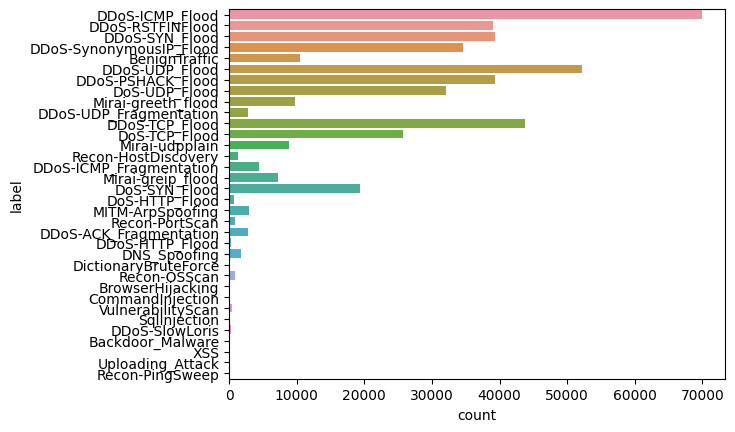

In [17]:
sns.countplot(y=train['label'])

# Classification: 34 (33+1) classes

In [18]:
labels = ['DDoS-RSTFINFlood',
'DDoS-PSHACK_Flood',
'DDoS-SYN_Flood',
'DDoS-UDP_Flood',
'DDoS-TCP_Flood',
'DDoS-ICMP_Flood',
'DDoS-SynonymousIP_Flood',
'DDoS-ACK_Fragmentation',
'DDoS-UDP_Fragmentation',
'DDoS-ICMP_Fragmentation',
'DDoS-SlowLoris',
'DDoS-HTTP_Flood',
'DoS-UDP_Flood',
'DoS-SYN_Flood',
'DoS-TCP_Flood',
'DoS-HTTP_Flood',
'Mirai-greeth_flood',
'Mirai-greip_flood',
'Mirai-udpplain',
'Recon-PingSweep',
'Recon-OSScan',
'Recon-PortScan',
'VulnerabilityScan',
'Recon-HostDiscovery',
'DNS_Spoofing',
'MITM-ArpSpoofing',
'BenignTraffic',
'BrowserHijacking',
'Backdoor_Malware',
'XSS',
'Uploading_Attack',
'SqlInjection',
'CommandInjection',
'DictionaryBruteForce']

# Label Encoding

In [19]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
# le(test)

In [20]:
# train.drop(['num_outbound_cmds'], axis=1, inplace=True)
# test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0       0.000000            0.0            1.0     102.2  204.980158   
1       0.000000           54.0            6.0      64.0    0.000000   
2       0.000000           54.0            6.0      64.0    0.000000   
3       3.394034          210.6            6.0      64.0    1.144677   
4       0.000000           54.0            6.0      64.0    0.992022   

        Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0  204.980158    0.0              0.0              0.0              0.0  ...   
1    0.000000    0.0              1.0              0.0              1.0  ...   
2    0.000000    0.0              0.0              1.0              0.0  ...   
3    1.144677    0.0              0.0              1.0              0.0  ...   
4    0.992022    0.0              1.0              0.0              1.0  ...   

   Std  Tot size           IAT  Number   Magnitue  Radius  Covariance  \
0  0.0      42.0  8.315011e+07     9.5   9.165151     0.0         0.0   
1  0.0      54.0  8.334862e+07     9.5  10.392305     0.0         0.0   
2  0.0      54.0  8.308927e+07     9.5  10.392305     0.0         0.0   
3  0.0      54.0  8.336215e+07     9.5  10.392305     0.0         0.0   
4  0.0      54.0  8.334381e+07     9.5  10.392305     0.0         0.0   

   Variance  Weight  label  
0       0.0  141.55      6  
1       0.0  141.55      9  
2       0.0  141.55     10  
3       0.0  141.55     12  
4       0.0  141.55      9  

[5 rows x 47 columns]

# Feature selection

In [21]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']

In [22]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
# sel.fit(X_train, Y_train)

# with progress bar
with tqdm(total=len(X_train)) as pbar:
    sel.fit(X_train, Y_train)
    pbar.update(len(X_train))
selected_features = X_train.columns[(sel.get_support())]

selected_features

100%|██████████| 451498/451498 [02:30<00:00, 2991.20it/s]


Index(['flow_duration', 'Header_Length', 'Protocol Type', 'fin_flag_number',
       'syn_flag_number', 'psh_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'ICMP', 'Tot sum', 'Min', 'Max', 'AVG', 'Tot size', 'IAT',
       'Magnitue'],
      dtype='object')

In [23]:
X_train = X_train[selected_features]

# Split and scale data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [25]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

# # with progress bar
# with tqdm(total=len(X_train)) as pbar:
#     X_train = scale.fit_transform(X_train)
#     pbar.update(len(X_train))


x_test = scale.transform(x_test)

In [26]:
evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[]})

# K Nearest Neighbors (KNN) classification model

In [27]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [28]:
study_KNN = optuna.create_study(direction='maximize')
# study_KNN.optimize(objective, n_trials=10)

# Create a tqdm progress bar
num_trials = 10
with tqdm(total=num_trials) as pbar:
    def callback(study_KNN, trial):
        pbar.update(1)

    # Set the callback to update the progress bar
    study_KNN.optimize(objective, n_trials=num_trials, callbacks=[callback])

print(study_KNN.best_trial)

100%|██████████| 10/10 [15:04<00:00, 90.46s/it]

FrozenTrial(number=9, state=1, values=[0.9641786637135474], datetime_start=datetime.datetime(2023, 11, 11, 22, 18, 30, 624611), datetime_complete=datetime.datetime(2023, 11, 11, 22, 20, 1, 755671), params={'KNN_n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=9, value=None)


In [29]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
# KNN_model.fit(x_train, y_train)

# Training with a progress bar
with tqdm(total=len(X_train)) as pbar:
    KNN_model.fit(x_train, y_train)
    pbar.update(len(X_train))

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

100%|██████████| 451498/451498 [00:00<00:00, 7804776.98it/s]


Train Score: 0.9794461600769503
Test Score: 0.9641786637135474


In [30]:
y_pred=KNN_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9641786637135474
Precision: 0.6233842469388587
Recall: 0.6030171062651783
F1 Score: 0.6078927332316104


In [31]:
acc_train=format(accuracy_score(KNN_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, KNN_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,KNN_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,KNN_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(KNN_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, KNN_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,KNN_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,KNN_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['K-Nearest Neighbour',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train) Recall(train)  \
0  K-Nearest Neighbour           0.979            0.797         0.712   

  F1_score(train) Accuracy(test) Precision(test) Recalll(test) F1_score(test)  
0           0.724          0.964           0.623         0.603          0.608

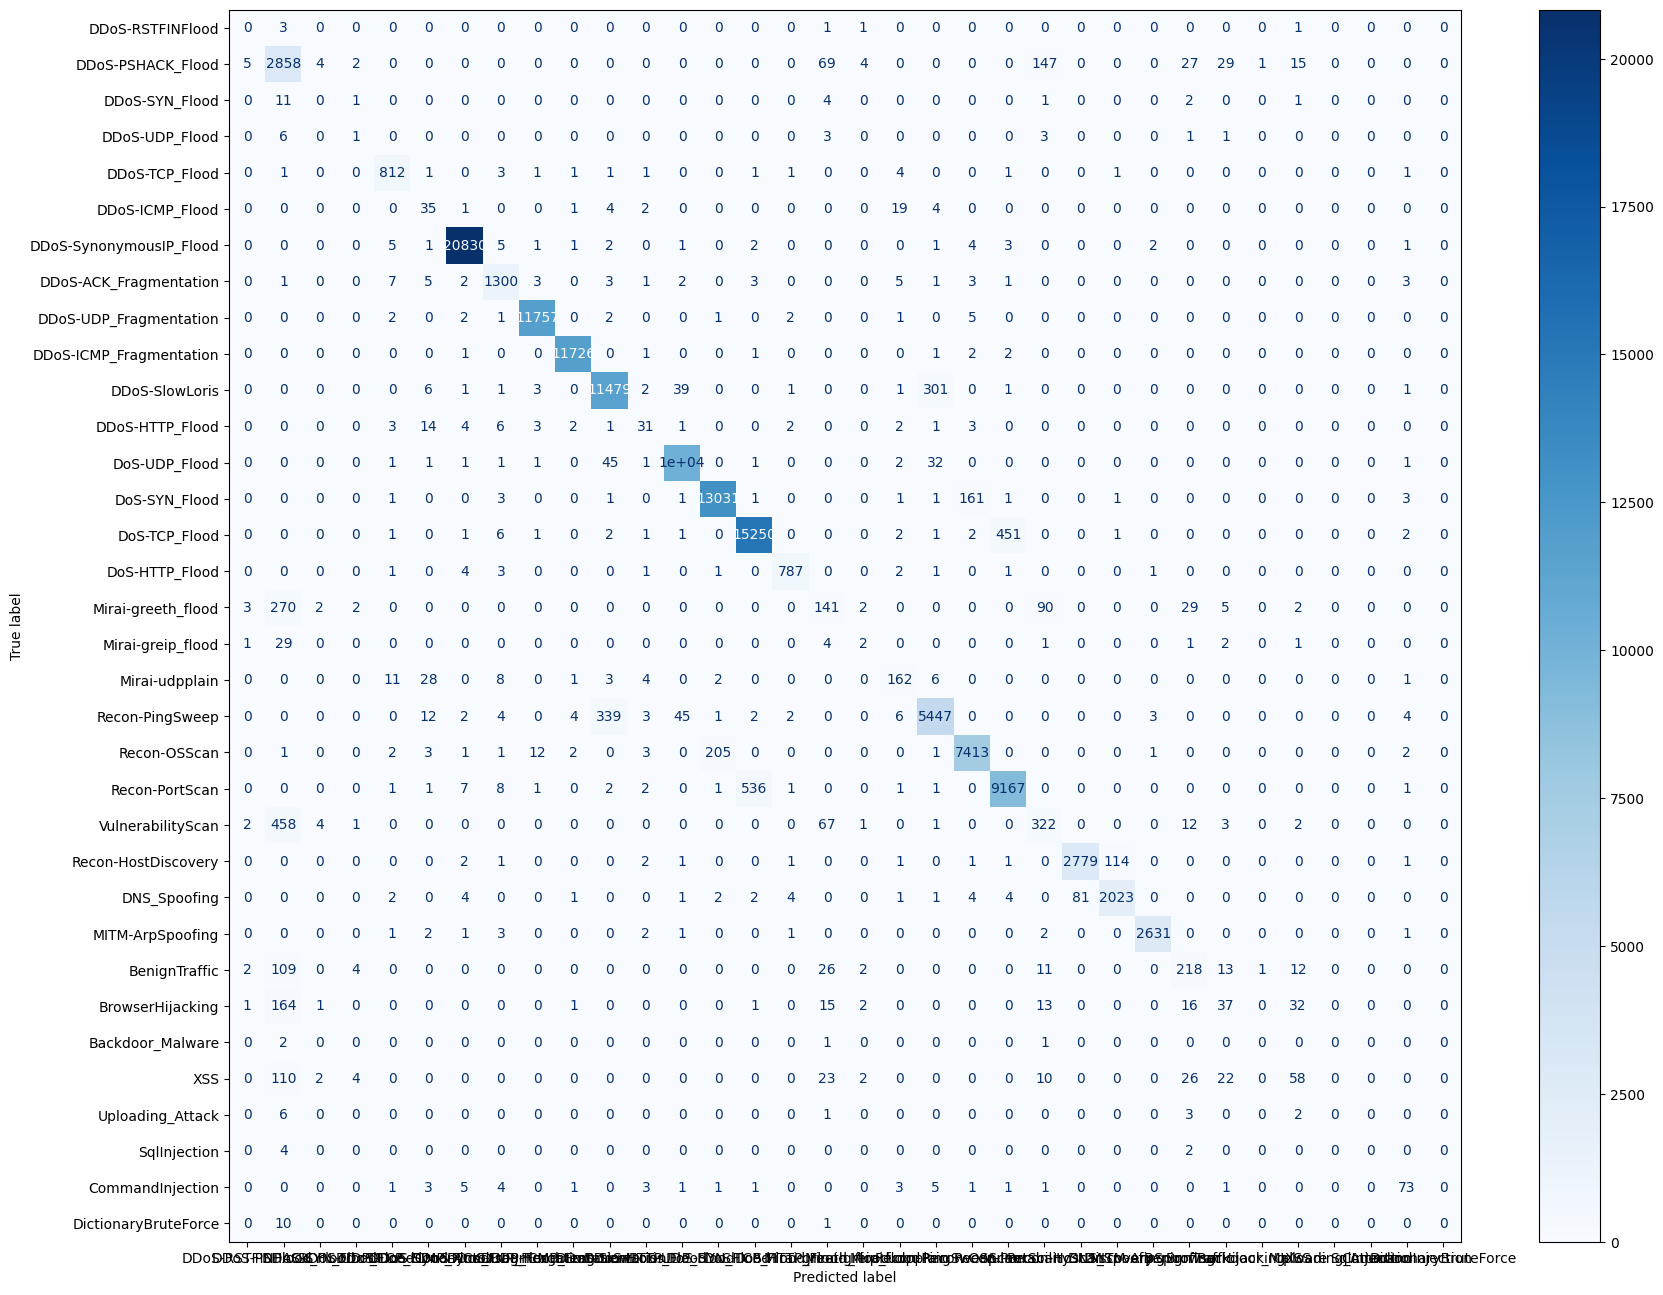

In [32]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=KNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

# Logistic Regression Model

In [33]:
lg_model = LogisticRegression(random_state = 42)
# lg_model.fit(x_train, y_train)

# Training with a progress bar
n_iterations = 1  # Adjust this based on your dataset size and needs
with tqdm(total=n_iterations, desc="Training Logistic Regression") as pbar:
    for _ in range(n_iterations):
        lg_model.fit(x_train, y_train)
        pbar.update(1)

Training Logistic Regression: 100%|██████████| 1/1 [01:13<00:00, 73.64s/it]


In [34]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.7890098972308004
Test Score: 0.7911111111111111


In [35]:
y_pred=lg_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.7911111111111111
Precision: 0.5133142563451862
Recall: 0.42005906736498144
F1 Score: 0.41688831441546215


In [36]:
acc_train=format(accuracy_score(lg_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, lg_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,lg_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,lg_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(lg_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, lg_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,lg_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,lg_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train) Recall(train)  \
0  K-Nearest Neighbour           0.979            0.797         0.712   
1  Logistic Regression           0.789            0.477         0.418   

  F1_score(train) Accuracy(test) Precision(test) Recalll(test) F1_score(test)  
0           0.724          0.964           0.623         0.603          0.608  
1           0.412          0.791           0.513         0.420          0.417

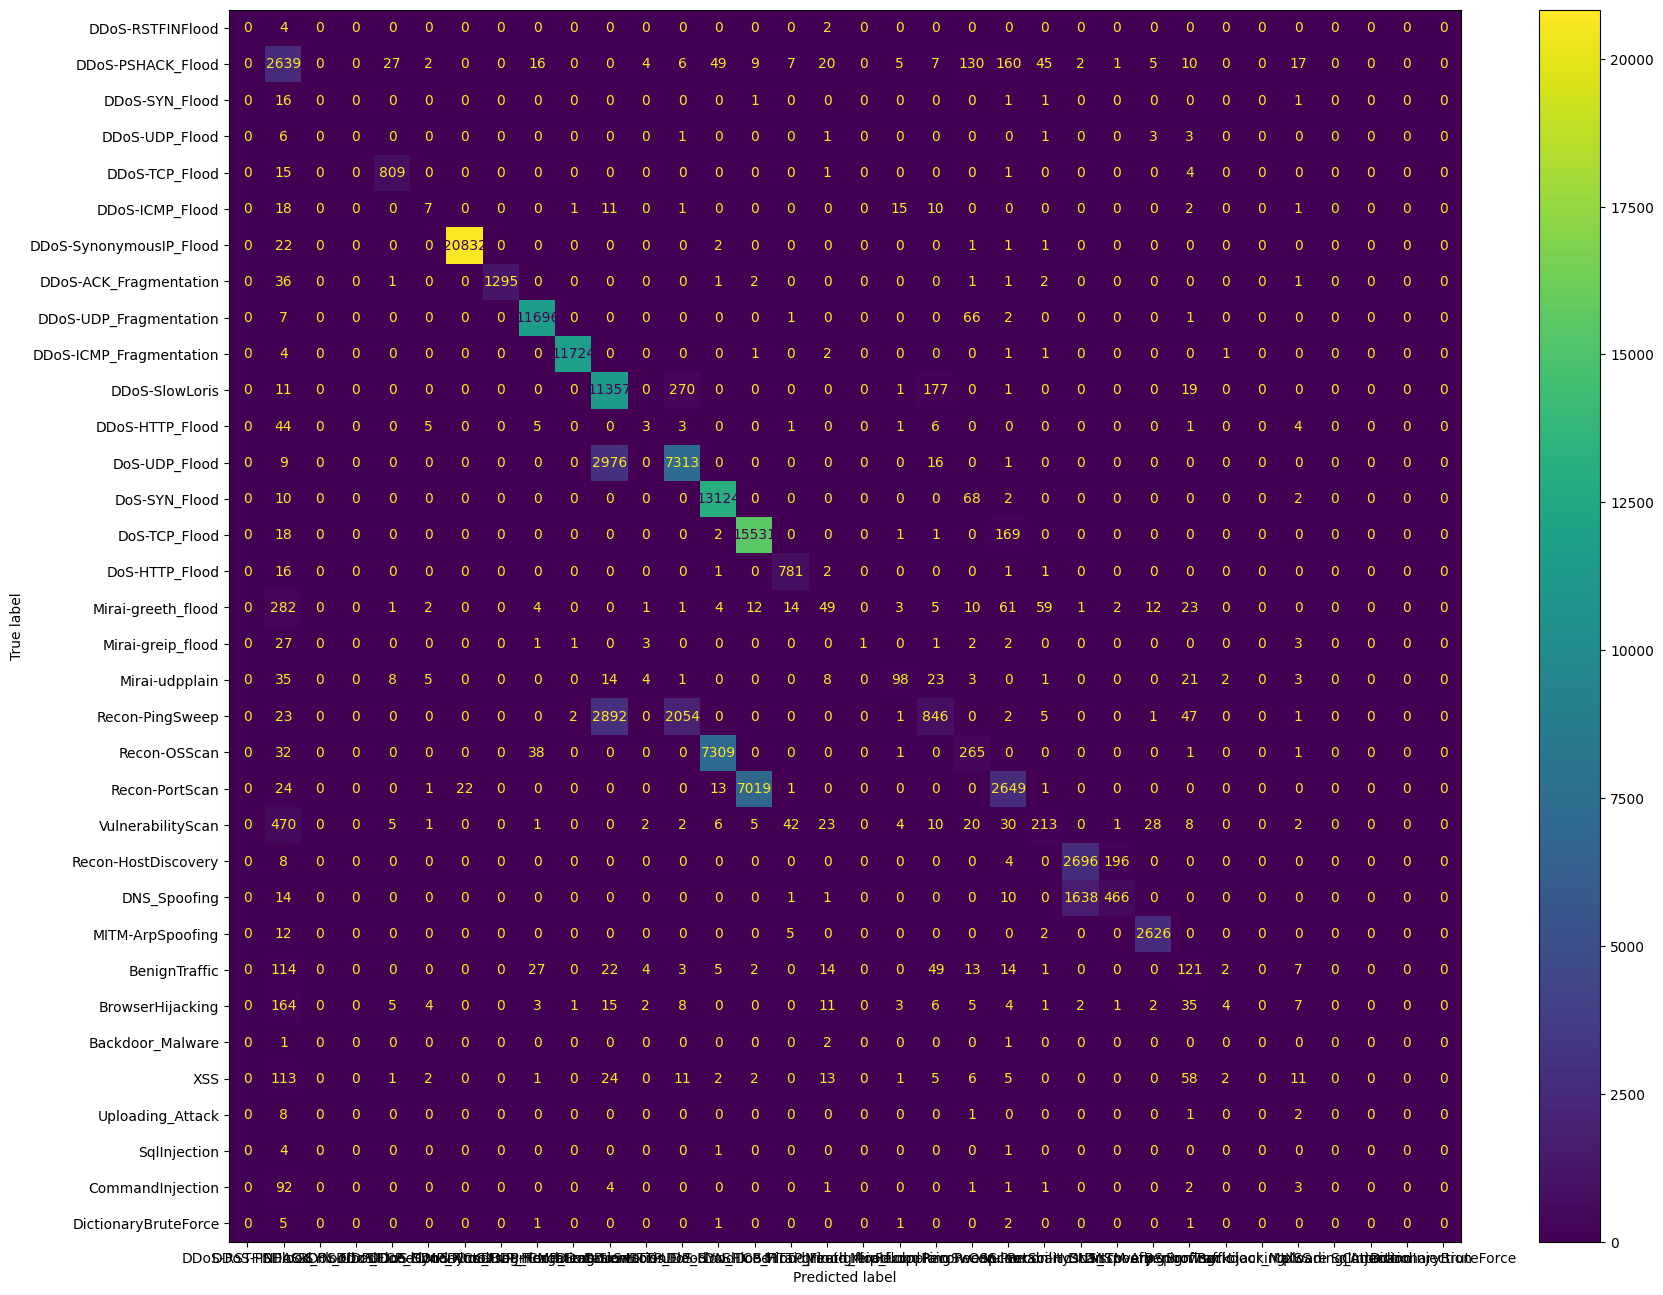

In [37]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# Decision Tree Classifier

In [38]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [39]:
study_dt = optuna.create_study(direction='maximize')
# study_dt.optimize(objective, n_trials=10)

# Create a tqdm progress bar
num_trials = 10
with tqdm(total=num_trials) as pbar:
    def callback(study_dt, trial):
        pbar.update(1)

    # Set the callback to update the progress bar
    study_dt.optimize(objective, n_trials=num_trials, callbacks=[callback])

print(study_dt.best_trial)

100%|██████████| 10/10 [00:12<00:00,  1.24s/it]

FrozenTrial(number=5, state=1, values=[0.9903654485049834], datetime_start=datetime.datetime(2023, 11, 11, 22, 48, 36, 903587), datetime_complete=datetime.datetime(2023, 11, 11, 22, 48, 38, 822605), params={'dt_max_depth': 28, 'dt_max_features': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=5, value=None)


In [40]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
# dt.fit(x_train, y_train)

# Training with a progress bar
n_iterations = 2  # Adjust this based on your dataset size and needs
with tqdm(total=n_iterations, desc="Training Decision Tree") as pbar:
    for _ in range(n_iterations):
        dt.fit(x_train, y_train)
        pbar.update(1)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Training Decision Tree: 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

Train Score: 0.9995538652356604
Test Score: 0.9908084163898118


In [41]:
y_pred=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9908084163898118
Precision: 0.7612070368210774
Recall: 0.7640586200265809
F1 Score: 0.7608007133229294


In [42]:
acc_train=format(accuracy_score(dt.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, dt.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,dt.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,dt.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(dt.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, dt.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,dt.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,dt.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train) Recall(train)  \
2        Decision Tree           1.000            0.998         0.993   
0  K-Nearest Neighbour           0.979            0.797         0.712   
1  Logistic Regression           0.789            0.477         0.418   

  F1_score(train) Accuracy(test) Precision(test) Recalll(test) F1_score(test)  
2           0.996          0.991           0.761         0.764          0.761  
0           0.724          0.964           0.623         0.603          0.608  
1           0.412          0.791           0.513         0.420          0.417

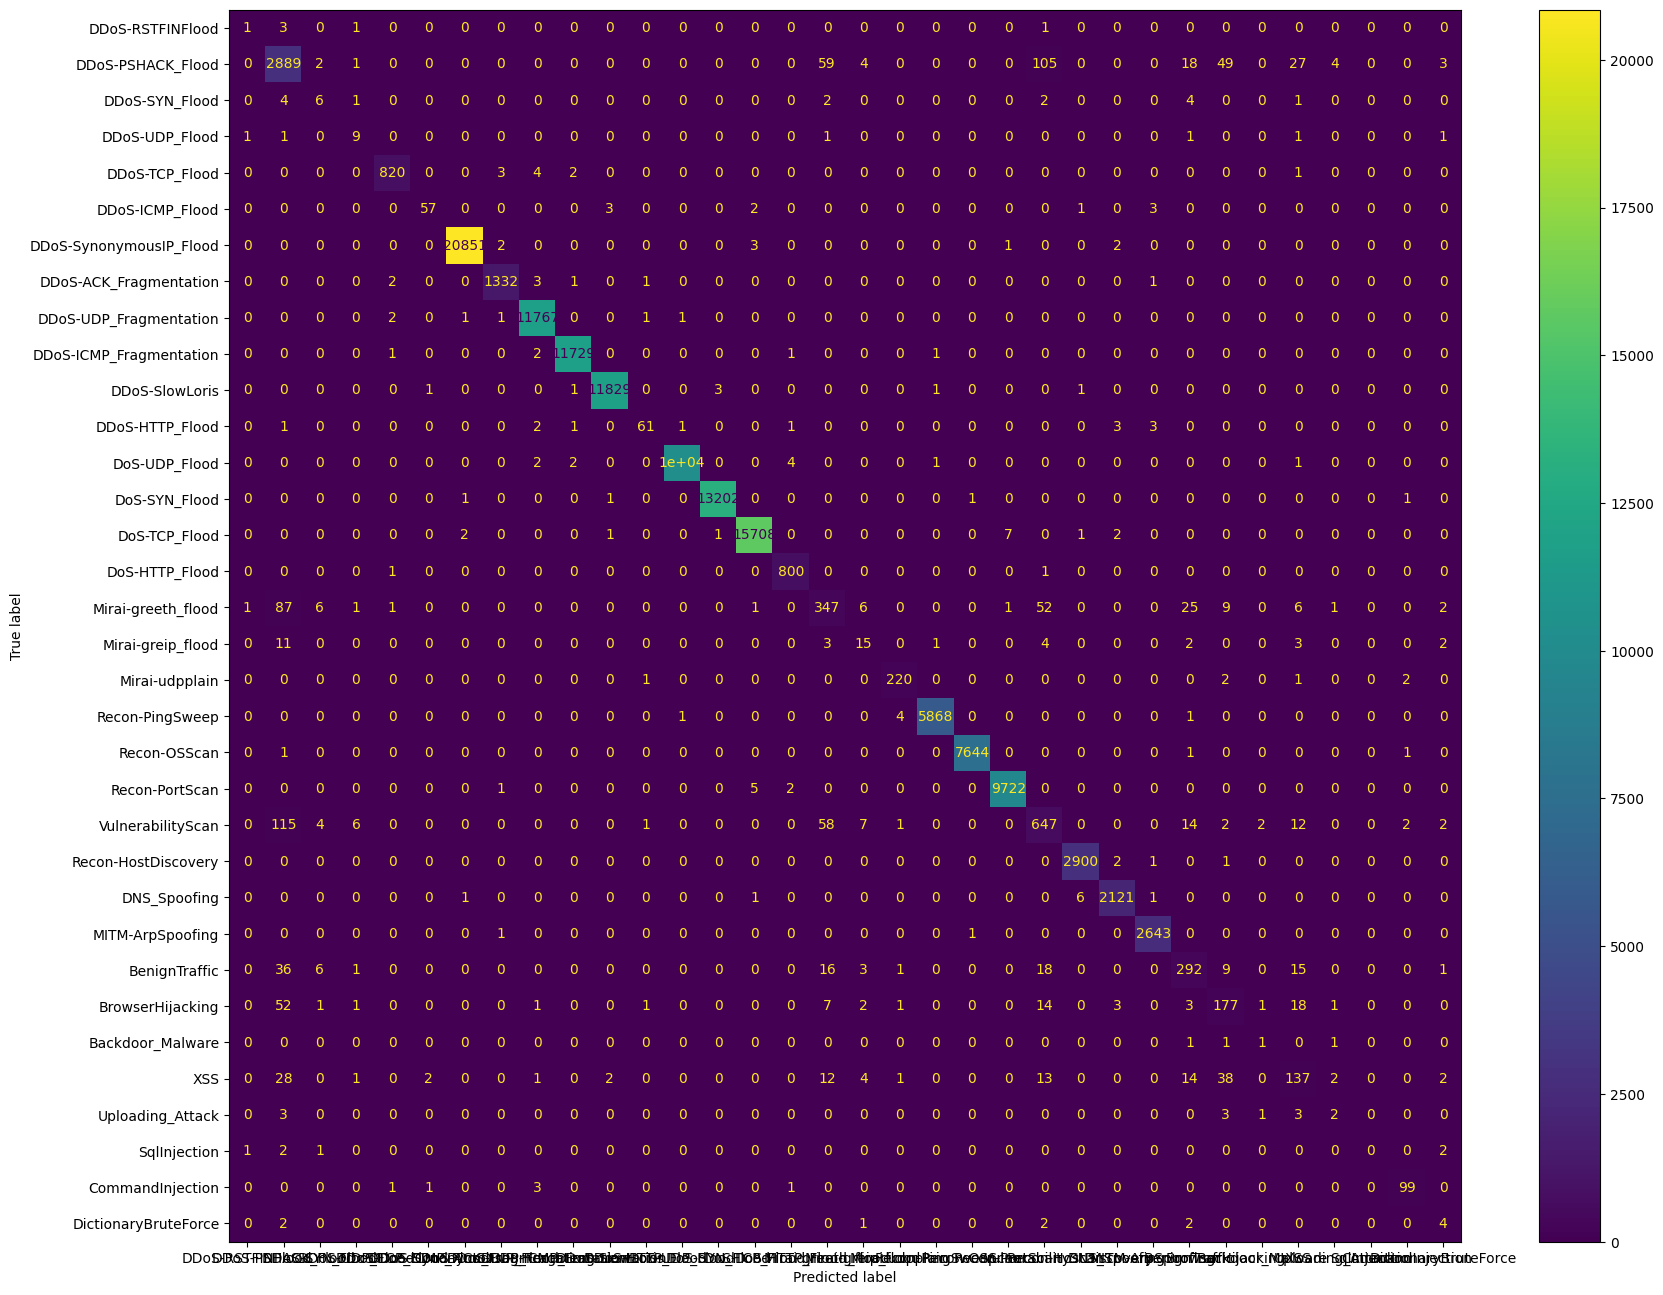

In [43]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

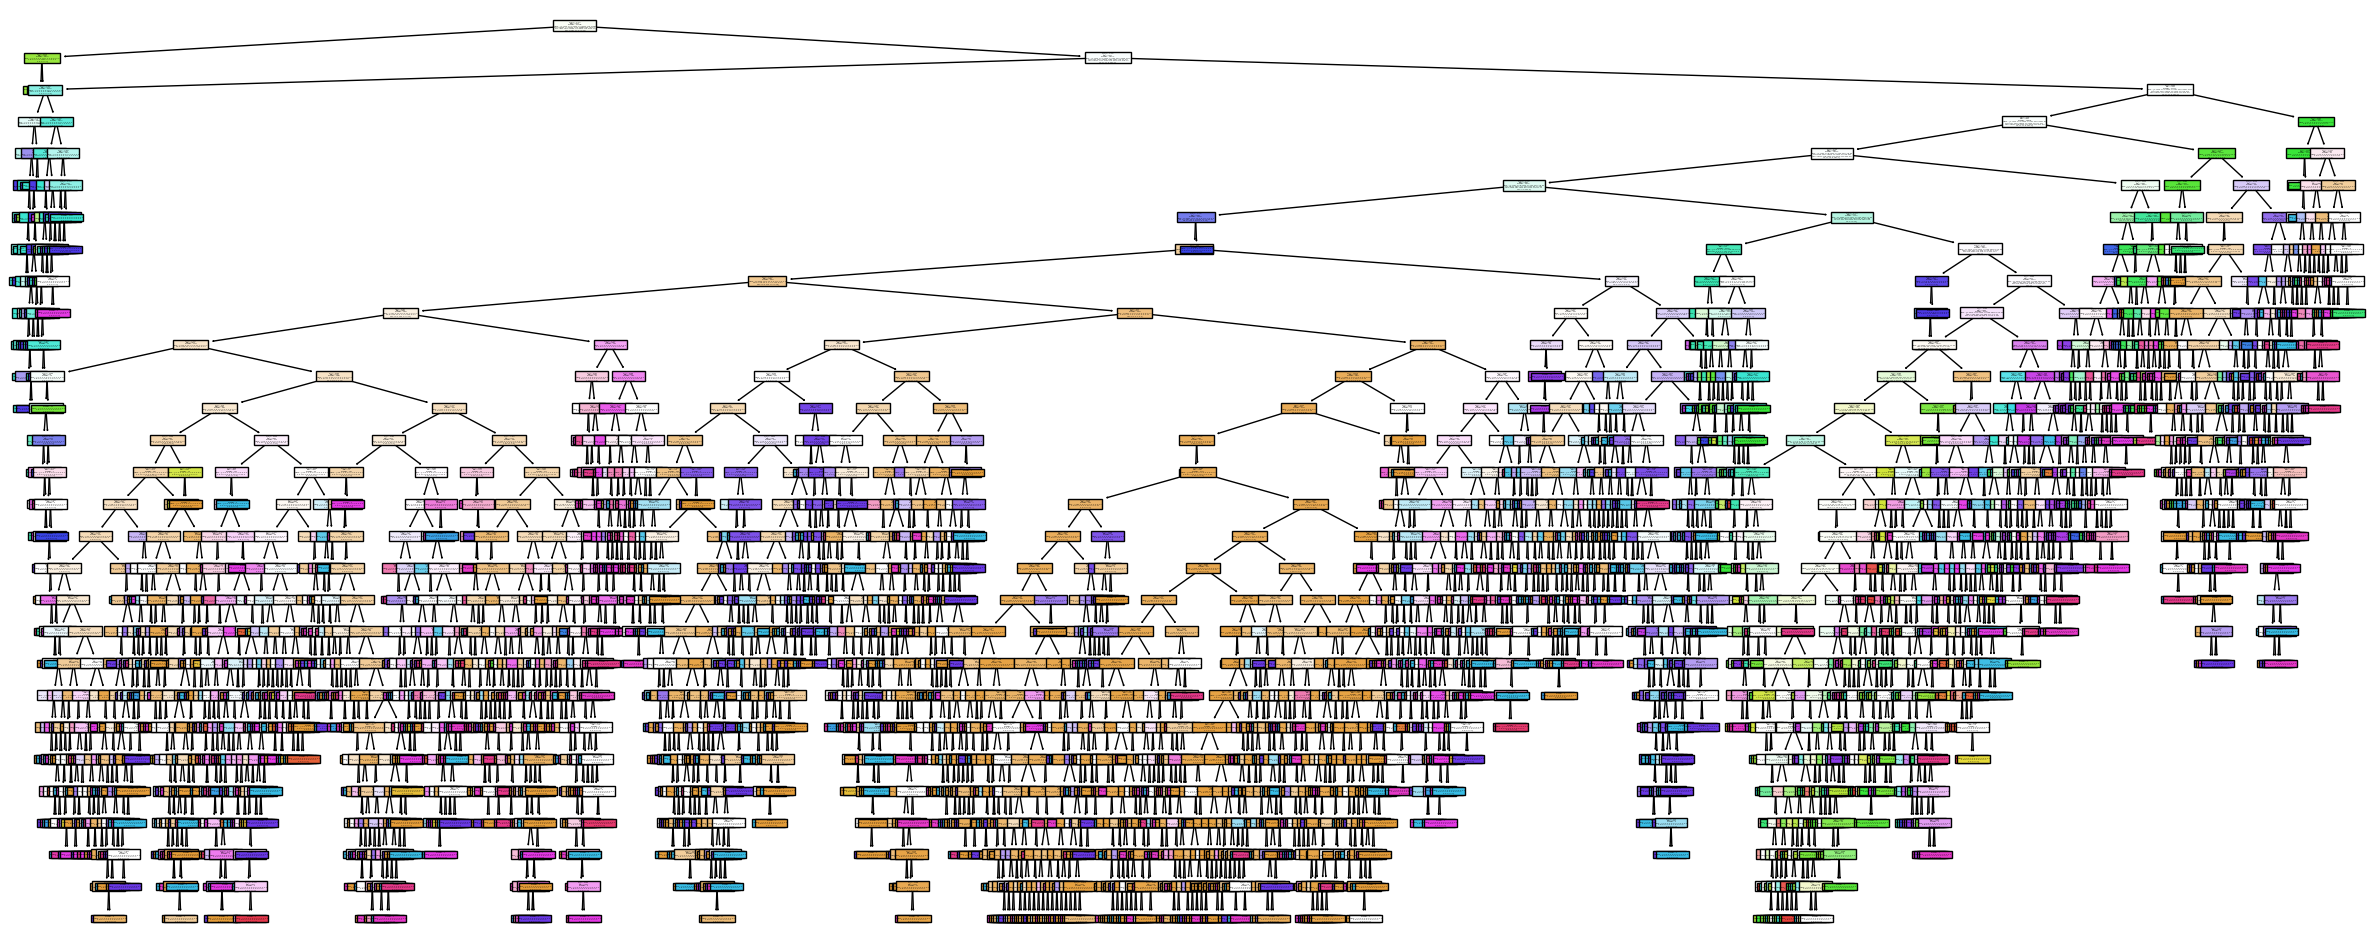

In [44]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

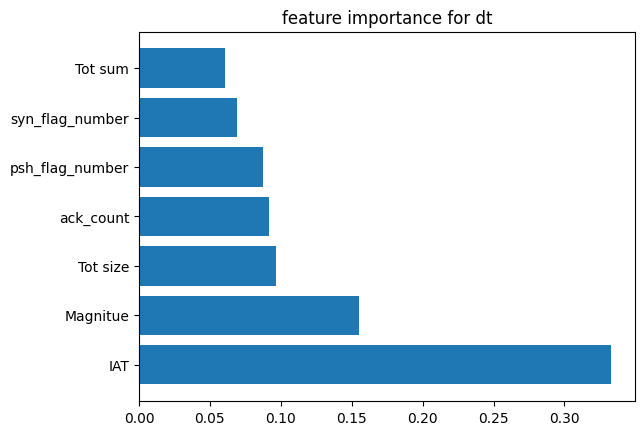

In [45]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

# Random Forest Classifier

In [46]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [47]:
study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective, n_trials=10)

# Create a tqdm progress bar
num_trials = 10
with tqdm(total=num_trials) as pbar:
    def callback(study_rf, trial):
        pbar.update(1)

    # Set the callback to update the progress bar
    study_rf.optimize(objective, n_trials=num_trials, callbacks=[callback])

print(study_rf.best_trial)

100%|██████████| 10/10 [02:06<00:00, 12.62s/it]

FrozenTrial(number=5, state=1, values=[0.9933628645256553], datetime_start=datetime.datetime(2023, 11, 11, 22, 53, 14, 605496), datetime_complete=datetime.datetime(2023, 11, 11, 22, 53, 46, 879508), params={'rf_max_depth': 17, 'rf_max_features': 10, 'rf_n_estimators': 20}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=5, value=None)


In [48]:
# rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
# rf.fit(x_train, y_train)

max_features = study_rf.best_trial.params['rf_max_features']
max_depth = study_rf.best_trial.params['rf_max_depth']
n_estimators = study_rf.best_trial.params['rf_n_estimators']
rf = RandomForestClassifier(max_features = max_features, max_depth = max_depth, n_estimators = n_estimators)
def train_random_forest(clf, X_train, y_train):
    clf.fit(x_train, y_train)
# Use a tqdm progress bar to track the number of completed trees
with tqdm(total=n_estimators, desc="Training Random Forest") as pbar:
    train_random_forest(rf, X_train, y_train)
    pbar.update(n_estimators)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Training Random Forest: 100%|██████████| 20/20 [00:34<00:00,  1.72s/it]


Train Score: 0.9957696299296309
Test Score: 0.9931118493909191


In [49]:
y_pred=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9931118493909191
Precision: 0.8464891301542948
Recall: 0.7401878760443191
F1 Score: 0.7622514182906001


In [50]:
acc_train=format(accuracy_score(rf.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, rf.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,rf.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,rf.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(rf.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, rf.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,rf.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,rf.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train) Recall(train)  \
3        Random Forest           0.996            0.984         0.845   
2        Decision Tree           1.000            0.998         0.993   
0  K-Nearest Neighbour           0.979            0.797         0.712   
1  Logistic Regression           0.789            0.477         0.418   

  F1_score(train) Accuracy(test) Precision(test) Recalll(test) F1_score(test)  
3           0.891          0.993           0.846         0.740          0.762  
2           0.996          0.991           0.761         0.764          0.761  
0           0.724          0.964           0.623         0.603          0.608  
1           0.412          0.791           0.513         0.420          0.417

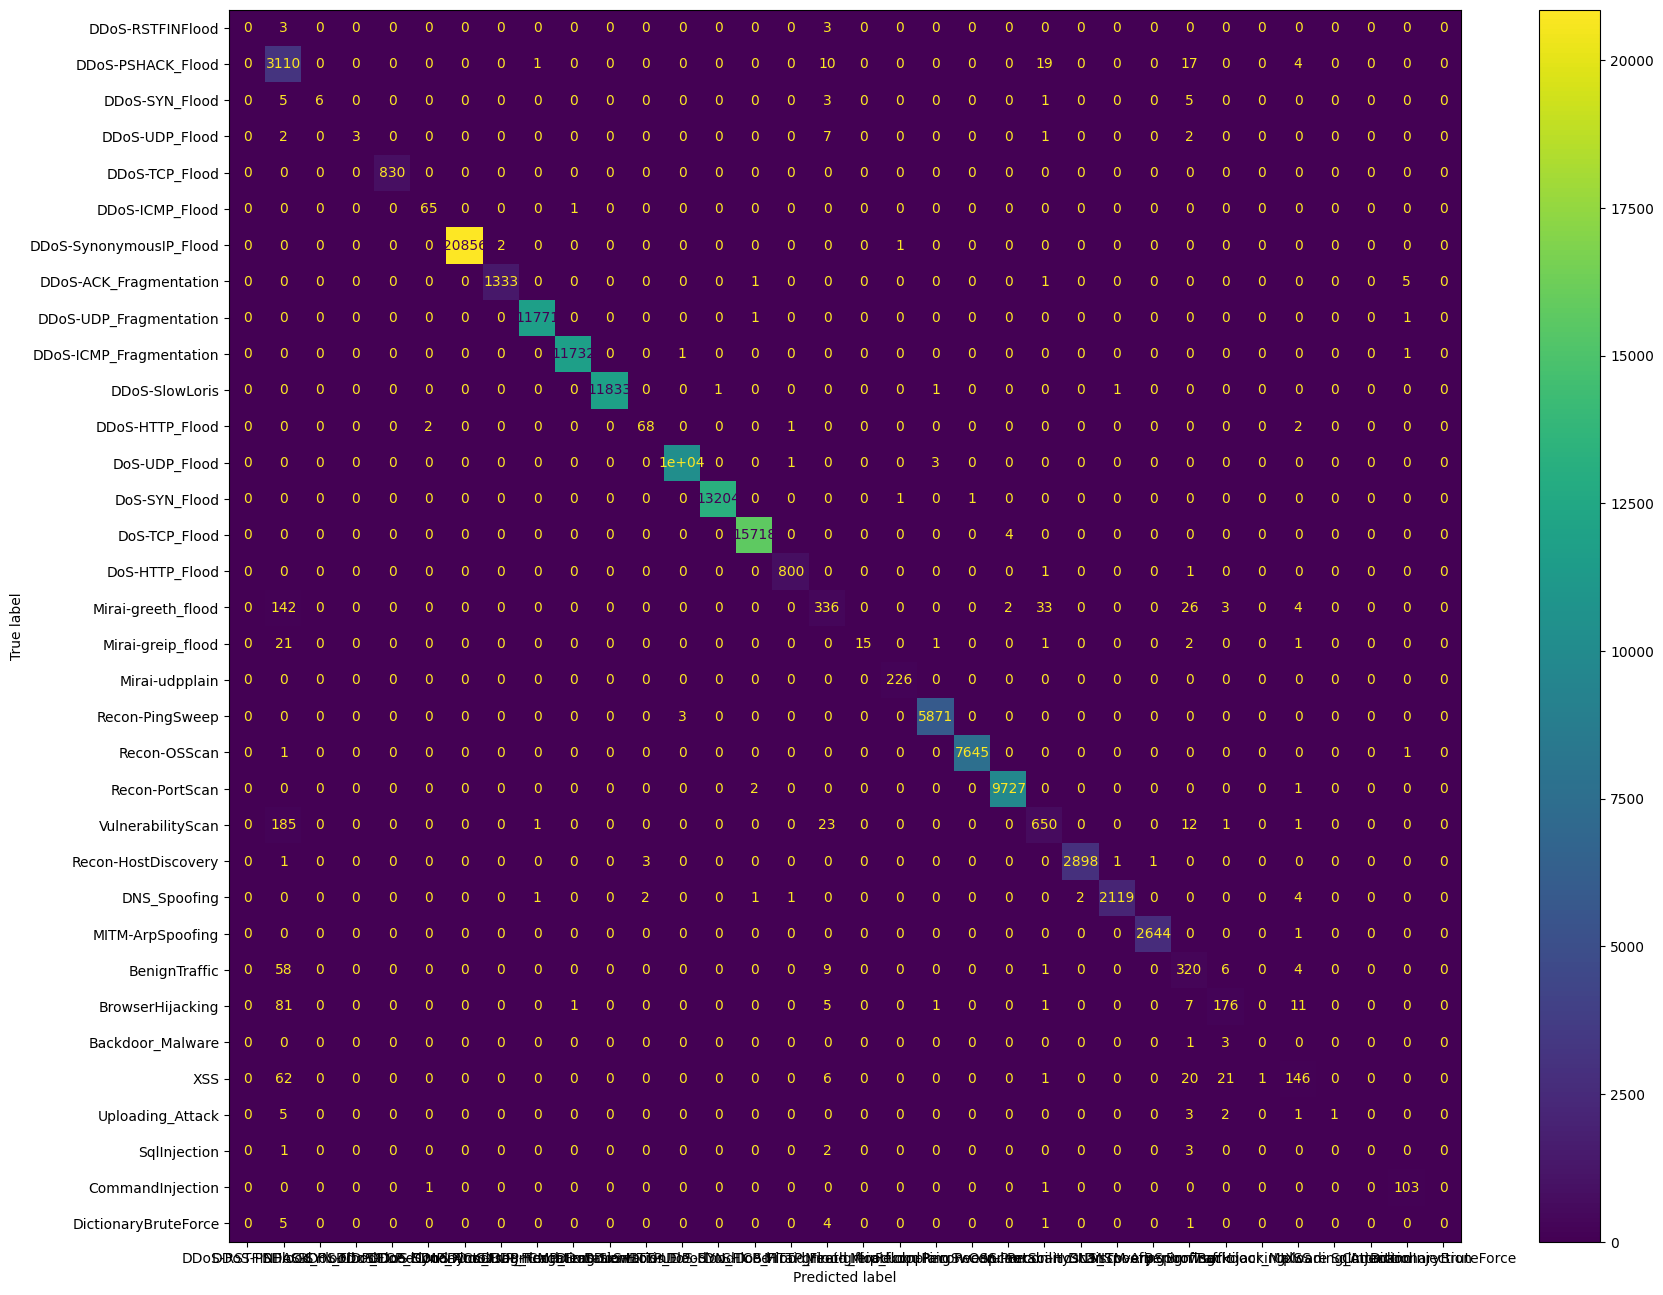

In [51]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

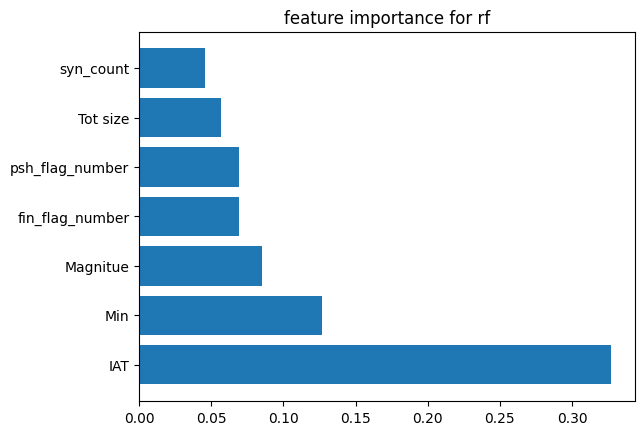

In [52]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for rf')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

# SKLearn Gradient Boosting Model

In [53]:
SKGB = GradientBoostingClassifier(random_state=42, verbose= True)
SKGB.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3465           78.55m
         2     2180291.4097           82.77m
         3 234798777298550003094549168128.0000           82.95m
         4 234798777298550003094549168128.0000           82.68m
         5 234798777298550003094549168128.0000           81.10m
         6 7866518382857801929954997338324753218273280.0000           77.03m
         7 7866518382857801929954997338324753218273280.0000           74.09m
         8 7866518382857801929954997338324753218273280.0000           71.74m
         9 7866518382857801929954997338324753218273280.0000           69.74m
        10 7866518382857801929954997338324753218273280.0000           68.07m
        20 93724655530363301081122858495773406047349243904.0000           55.81m
        30 93724655530363301081122858495773406047349243904.0000           49.30m
        40 93724655530363301081122858495773406047349243904.0000           42.27m
        50 937246555303633010811228584957734

GradientBoostingClassifier(random_state=42, verbose=True)

In [54]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9887960056700248
Test Score: 0.9875673680324843


In [55]:
y_pred=SKGB.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9875673680324843
Precision: 0.7346304077951435
Recall: 0.6981577671880143
F1 Score: 0.7075999435328256


In [56]:
acc_train=format(accuracy_score(SKGB.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, SKGB.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,SKGB.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,SKGB.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(SKGB.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, SKGB.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,SKGB.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,SKGB.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
1           Logistic Regression           0.789            0.477   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
1         0.418           0.412          0.791           0.513         0.420   

  F1_score(test)  
3          0.762  
2          0.761  
4          0.708  
0          0.608  
1          0.417

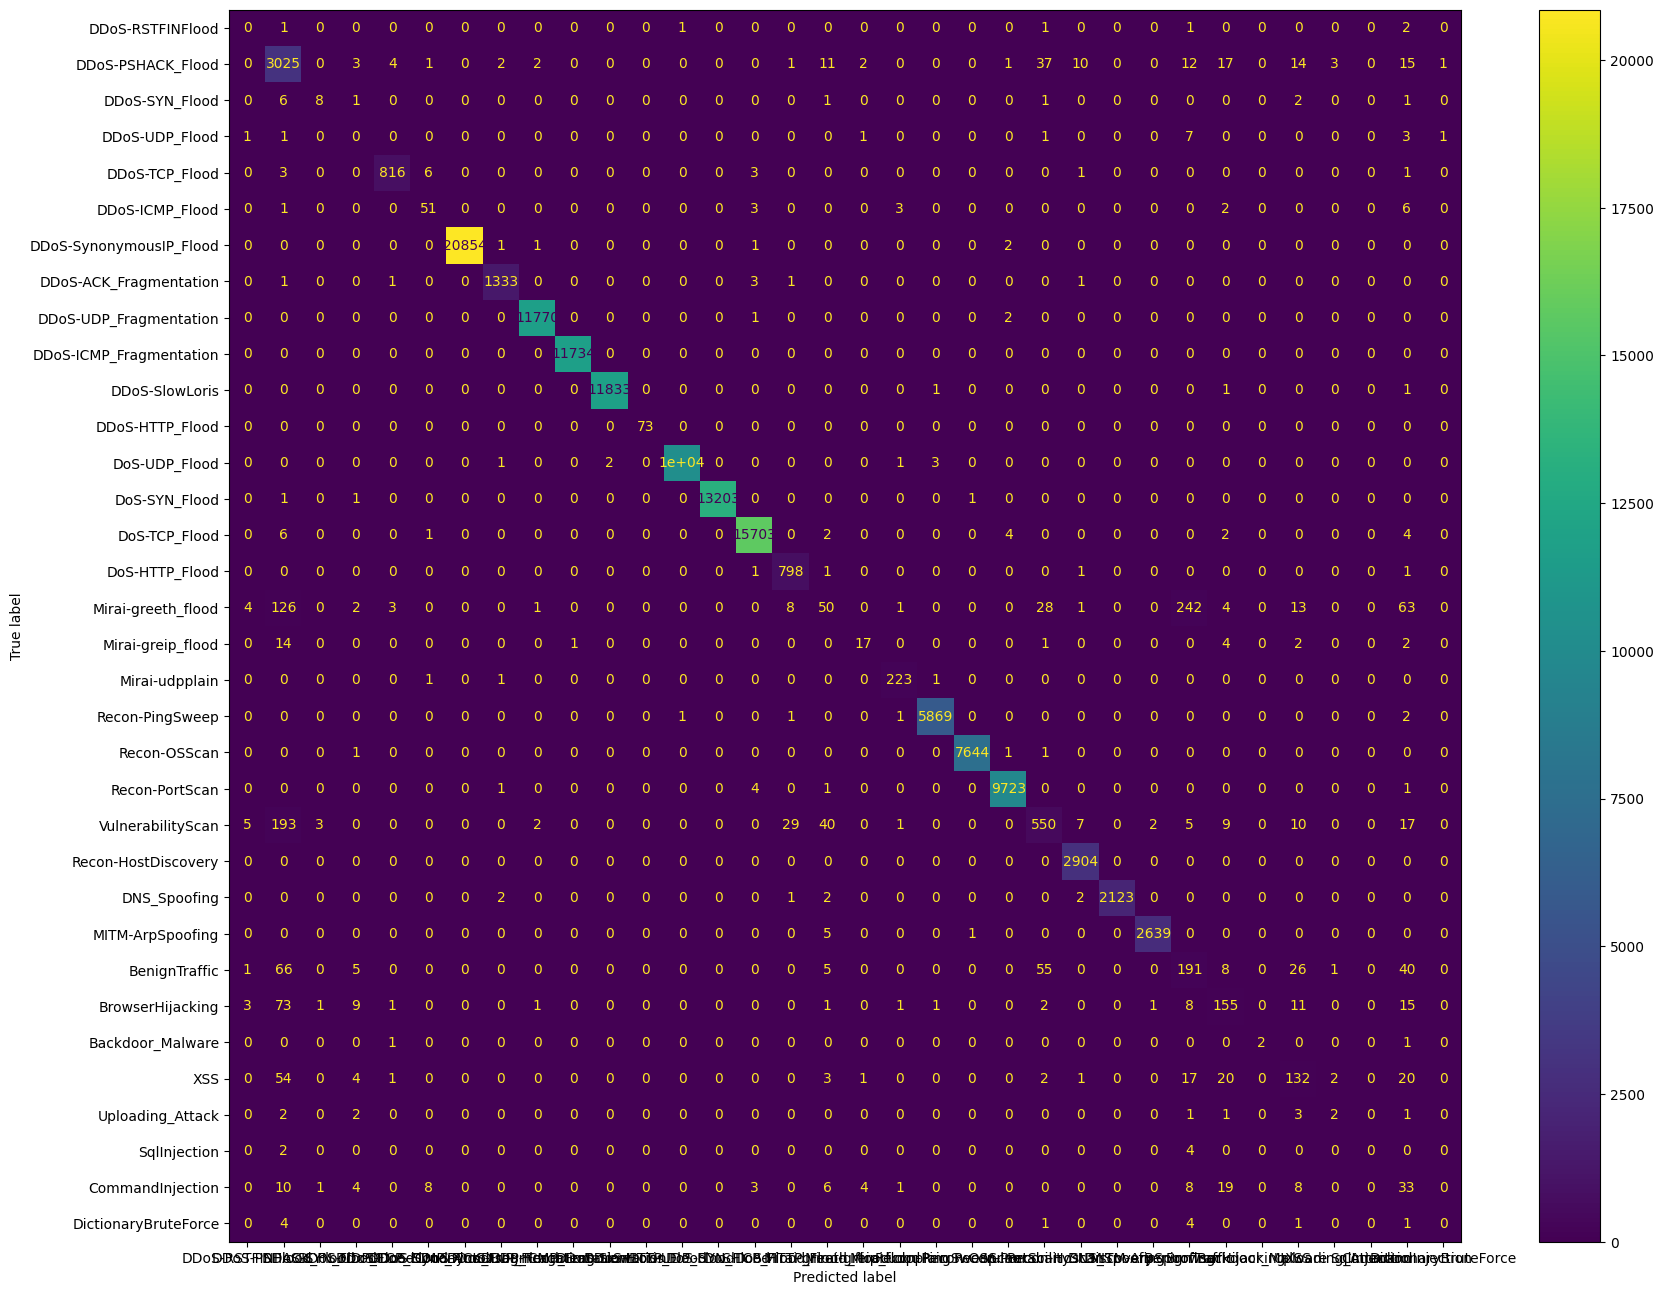

In [57]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=SKGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# XGBoost Gradient Boosting Model

In [58]:
## Without Progress bar
# xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
# xgb_model.fit(x_train, y_train)



## With Progress bar
# Create an XGBoost classifier
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_model = XGBClassifier(**params)

# Training with a progress bar
with tqdm(total=params['n_estimators']) as pbar:
    xgb_model.fit(x_train, y_train, eval_metric="mlogloss", verbose=True, eval_set=[(x_test, y_test)])
    pbar.update(params['n_estimators'])
    
# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate the classifier
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

  0%|          | 0/100 [00:00<?, ?it/s]

[0]	validation_0-mlogloss:1.96522
[1]	validation_0-mlogloss:1.64602
[2]	validation_0-mlogloss:1.41892
[3]	validation_0-mlogloss:1.24276
[4]	validation_0-mlogloss:1.09975
[5]	validation_0-mlogloss:0.98014
[6]	validation_0-mlogloss:0.87801
[7]	validation_0-mlogloss:0.78979
[8]	validation_0-mlogloss:0.71282
[9]	validation_0-mlogloss:0.64506
[10]	validation_0-mlogloss:0.58529
[11]	validation_0-mlogloss:0.53208
[12]	validation_0-mlogloss:0.48438
[13]	validation_0-mlogloss:0.44184
[14]	validation_0-mlogloss:0.40374
[15]	validation_0-mlogloss:0.36947
[16]	validation_0-mlogloss:0.33868
[17]	validation_0-mlogloss:0.31098
[18]	validation_0-mlogloss:0.28597
[19]	validation_0-mlogloss:0.26343
[20]	validation_0-mlogloss:0.24303
[21]	validation_0-mlogloss:0.22467
[22]	validation_0-mlogloss:0.20805
[23]	validation_0-mlogloss:0.19268
[24]	validation_0-mlogloss:0.17881
[25]	validation_0-mlogloss:0.16620
[26]	validation_0-mlogloss:0.15475
[27]	validation_0-mlogloss:0.14428
[28]	validation_0-mlogloss:0.1

100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Accuracy: 0.9907124400147655


In [59]:
xgb_train, xgb_test = xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 0.9913937123474915
Test Score: 0.9907124400147655


In [60]:
y_pred=xgb_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9907124400147655
Precision: 0.7038441663286054
Recall: 0.6897756156756176
F1 Score: 0.6939410033090501


In [61]:
acc_train=format(accuracy_score(xgb_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, xgb_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,xgb_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,xgb_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(xgb_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, xgb_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,xgb_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,xgb_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBoosting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
5         XGBoosting Classifier           0.991            0.878   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
1           Logistic Regression           0.789            0.477   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
5         0.711           0.728          0.991           0.704         0.690   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
1         0.418           0.412          0.791           0.513         0.420   

  F1_score(test)  
3          0.762  
2          0.761  
5          0.694  
4          0.708  
0          0.608  
1          0.417

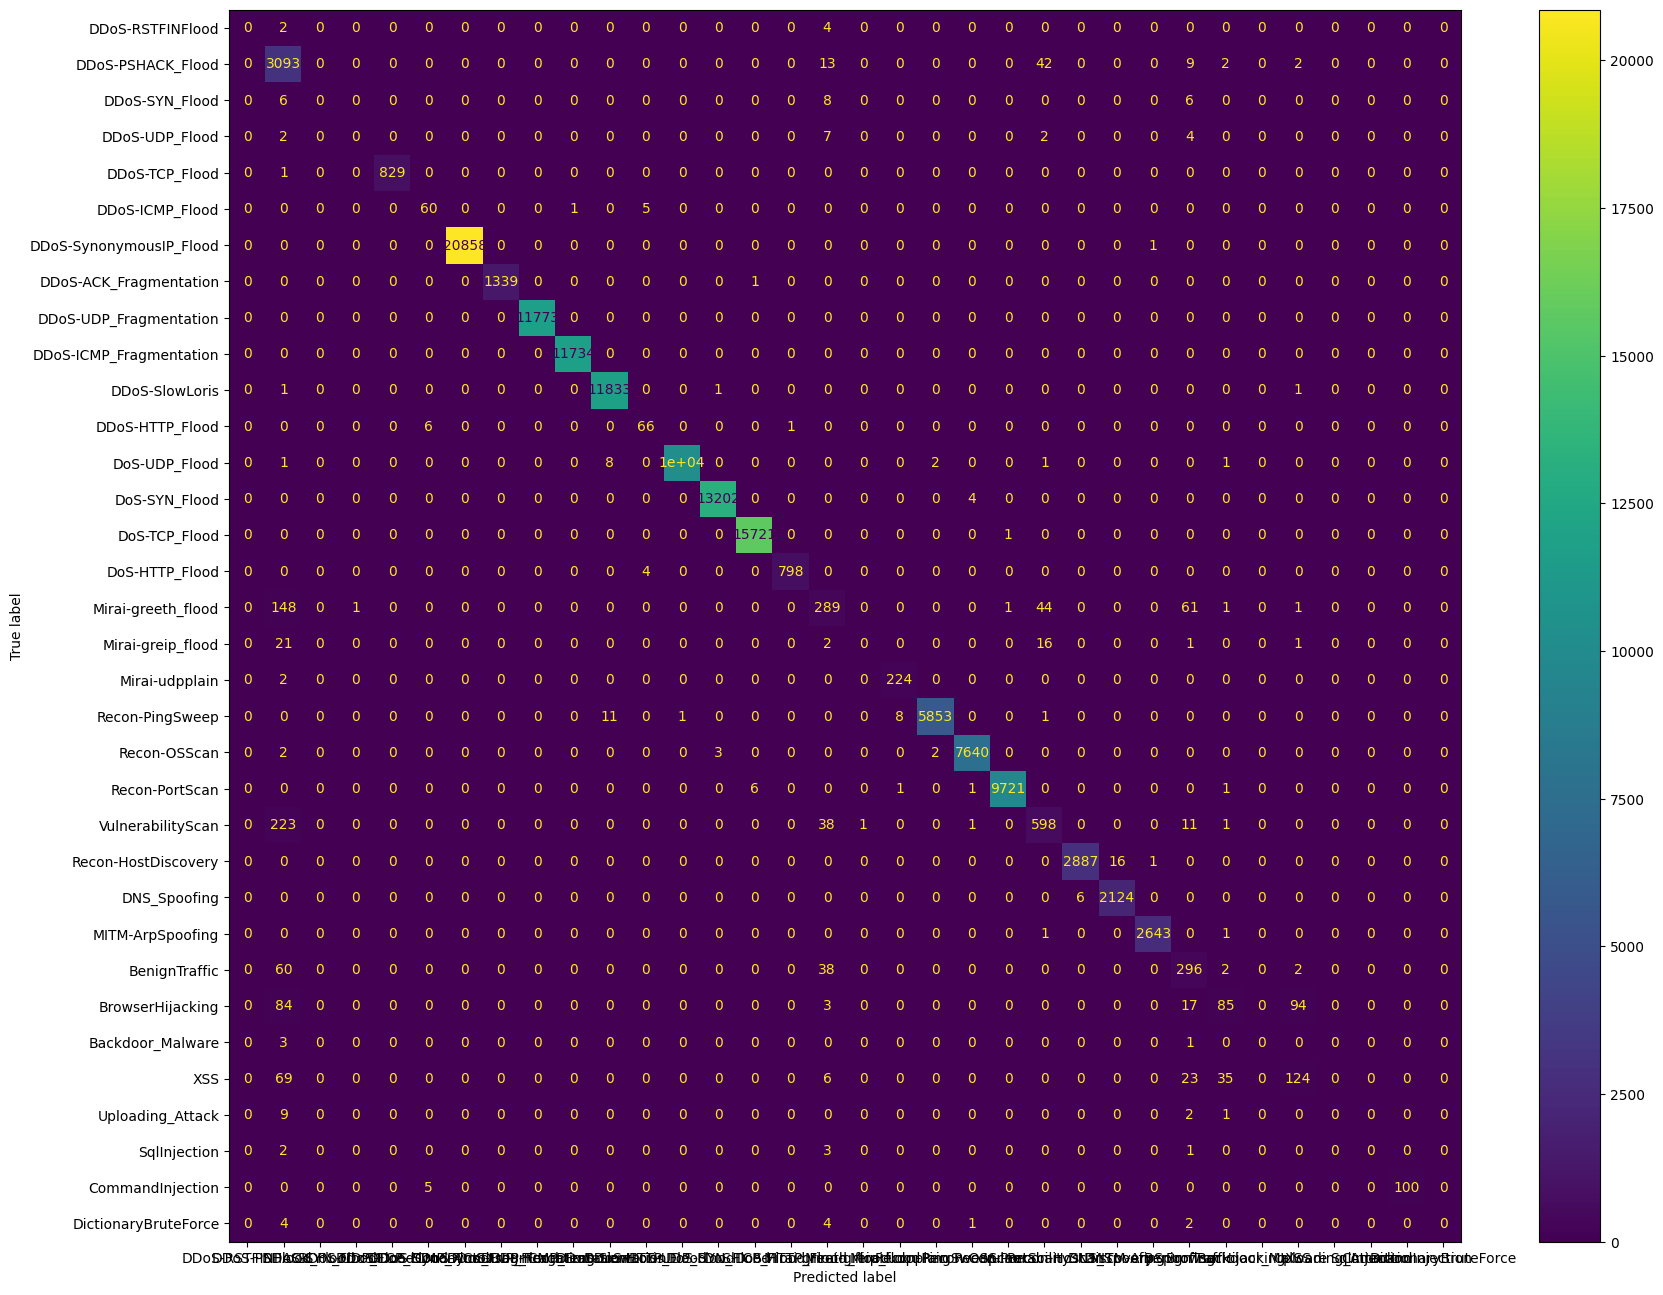

In [62]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# Light Gradient Boosting Model

In [63]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3075
[LightGBM] [Info] Number of data points in the train set: 316048, number of used features: 17
[LightGBM] [Info] Start training from score -9.619127
[LightGBM] [Info] Start training from score -3.761738
[LightGBM] [Info] Start training from score -9.052731
[LightGBM] [Info] Start training from score -9.000088
[LightGBM] [Info] Start training from score -5.095787
[LightGBM] [Info] Start training from score -7.350443
[LightGBM] [Info] Start training from score -1.863421
[LightGBM] [Info] Start training from score -4.632589
[LightGBM] [Info] Start training from score -2.438151
[LightGBM] [Info] Start training from score -2.449630
[LightGBM] [Info] Start training from score -2.444147
[LightGBM] [Info] Start training from score -7.58847

LGBMClassifier(random_state=42)

In [64]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 0.37361729863818155
Test Score: 0.3731339977851606


In [65]:
y_pred=lgb_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.3731339977851606
Precision: 0.11730677303159955
Recall: 0.11741501048636349
F1 Score: 0.09298628135954612


In [66]:
acc_train=format(accuracy_score(lgb_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, lgb_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,lgb_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,lgb_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(lgb_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, lgb_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,lgb_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,lgb_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['light GBM',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
5         XGBoosting Classifier           0.991            0.878   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
1           Logistic Regression           0.789            0.477   
6                     light GBM           0.374            0.123   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
5         0.711           0.728          0.991           0.704         0.690   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
1         0.418           0.412          0.791           0.513         0.420   
6         0.117           0.093          0.373           0.117         0.117   

  F1_score(test)  
3          0.762  
2          0.761  
5          0.694  
4          0.708  
0          0.608  
1          0.417  
6          0.093

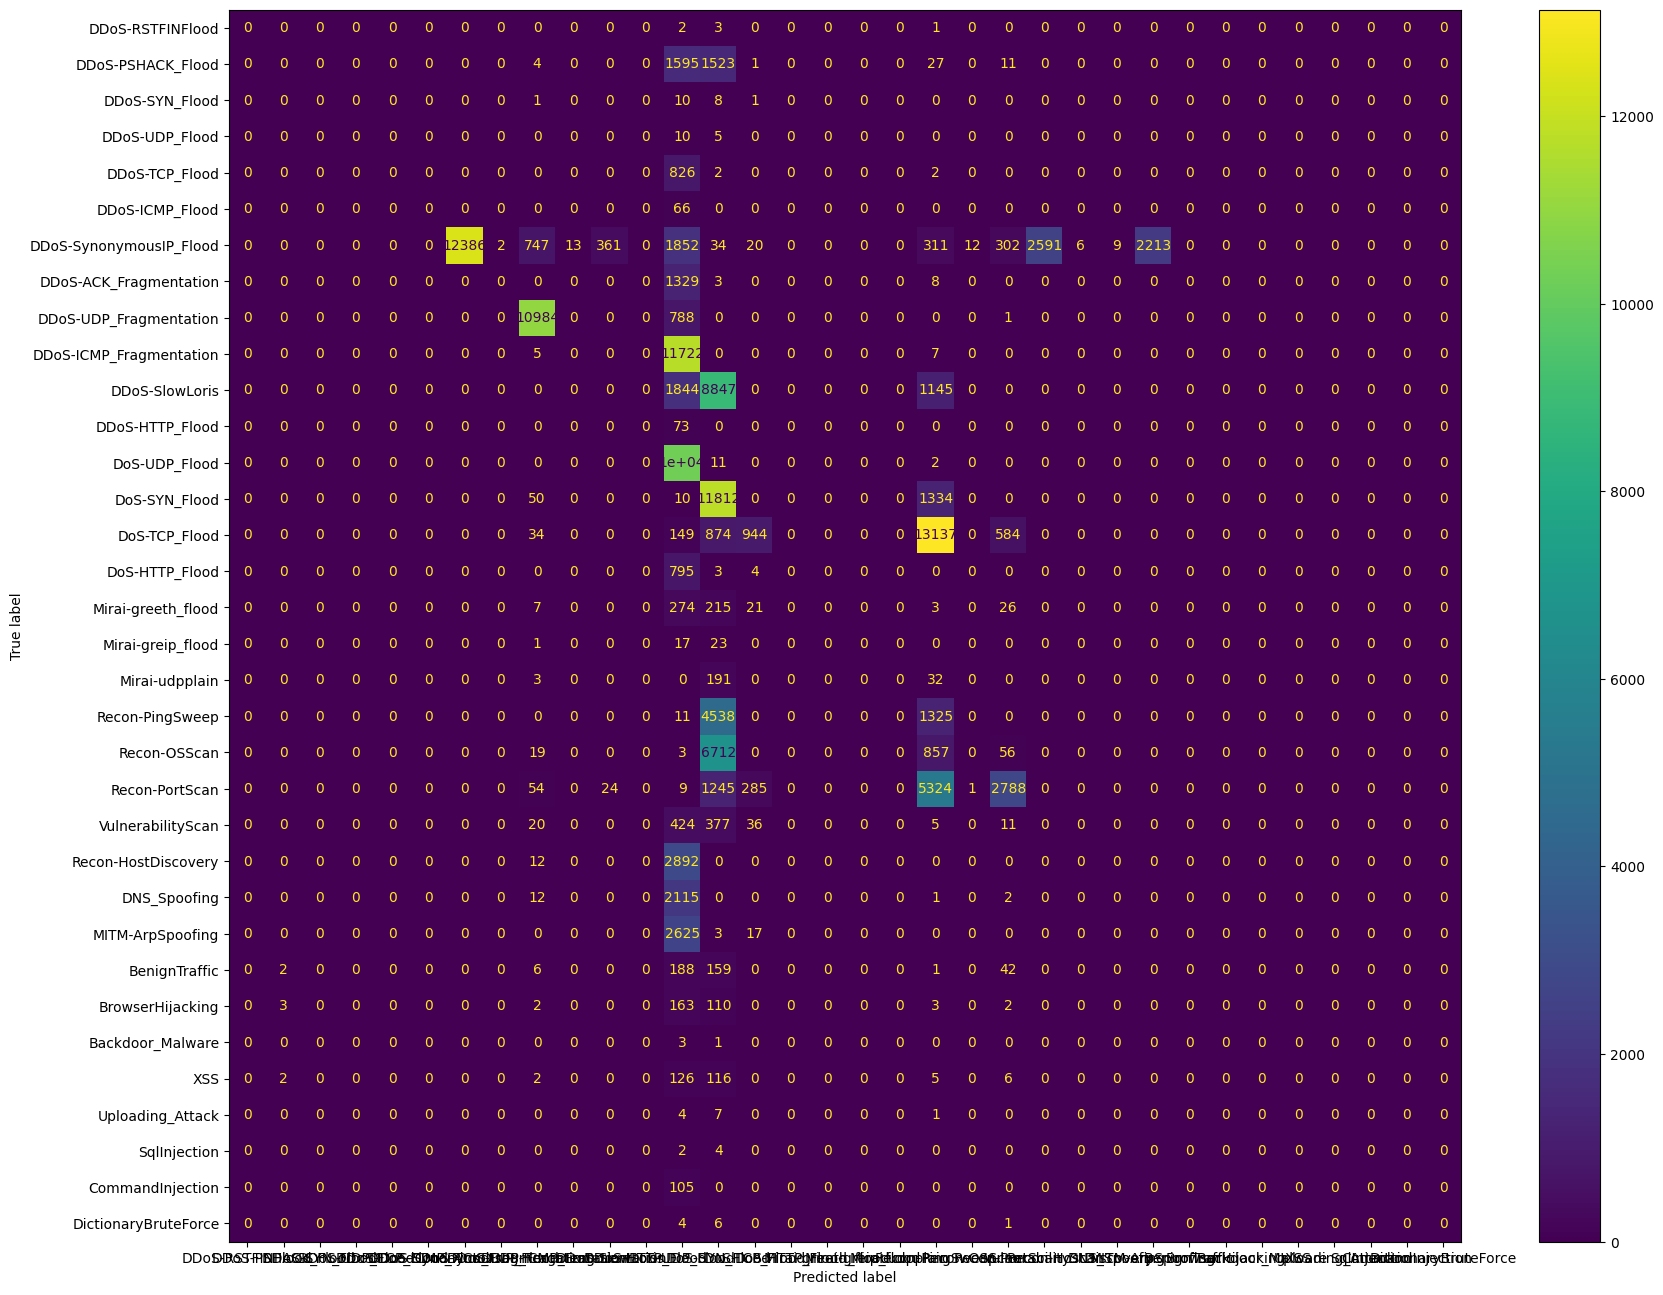

In [67]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=lgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# SKLearn AdaBoost Model

In [68]:
ab_model = AdaBoostClassifier(random_state=42)

In [69]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [70]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 0.8245234901027692
Test Score: 0.8247619047619048


In [71]:
y_pred=ab_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.8247619047619048
Precision: 0.5097316482309819
Recall: 0.47429134894791064
F1 Score: 0.4595086562441505


In [72]:
acc_train=format(accuracy_score(ab_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, ab_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,ab_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,ab_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(ab_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, ab_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,ab_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,ab_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
5         XGBoosting Classifier           0.991            0.878   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
7           AdaBoost Classifier           0.825            0.509   
1           Logistic Regression           0.789            0.477   
6                     light GBM           0.374            0.123   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
5         0.711           0.728          0.991           0.704         0.690   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
7         0.484           0.469          0.825           0.510         0.474   
1         0.418           0.412          0.791           0.513         0.420   
6         0.117           0.093          0.373           0.117         0.117   

  F1_score(test)  
3          0.762  
2          0.761  
5          0.694  
4          0.708  
0          0.608  
7          0.460  
1          0.417  
6          0.093

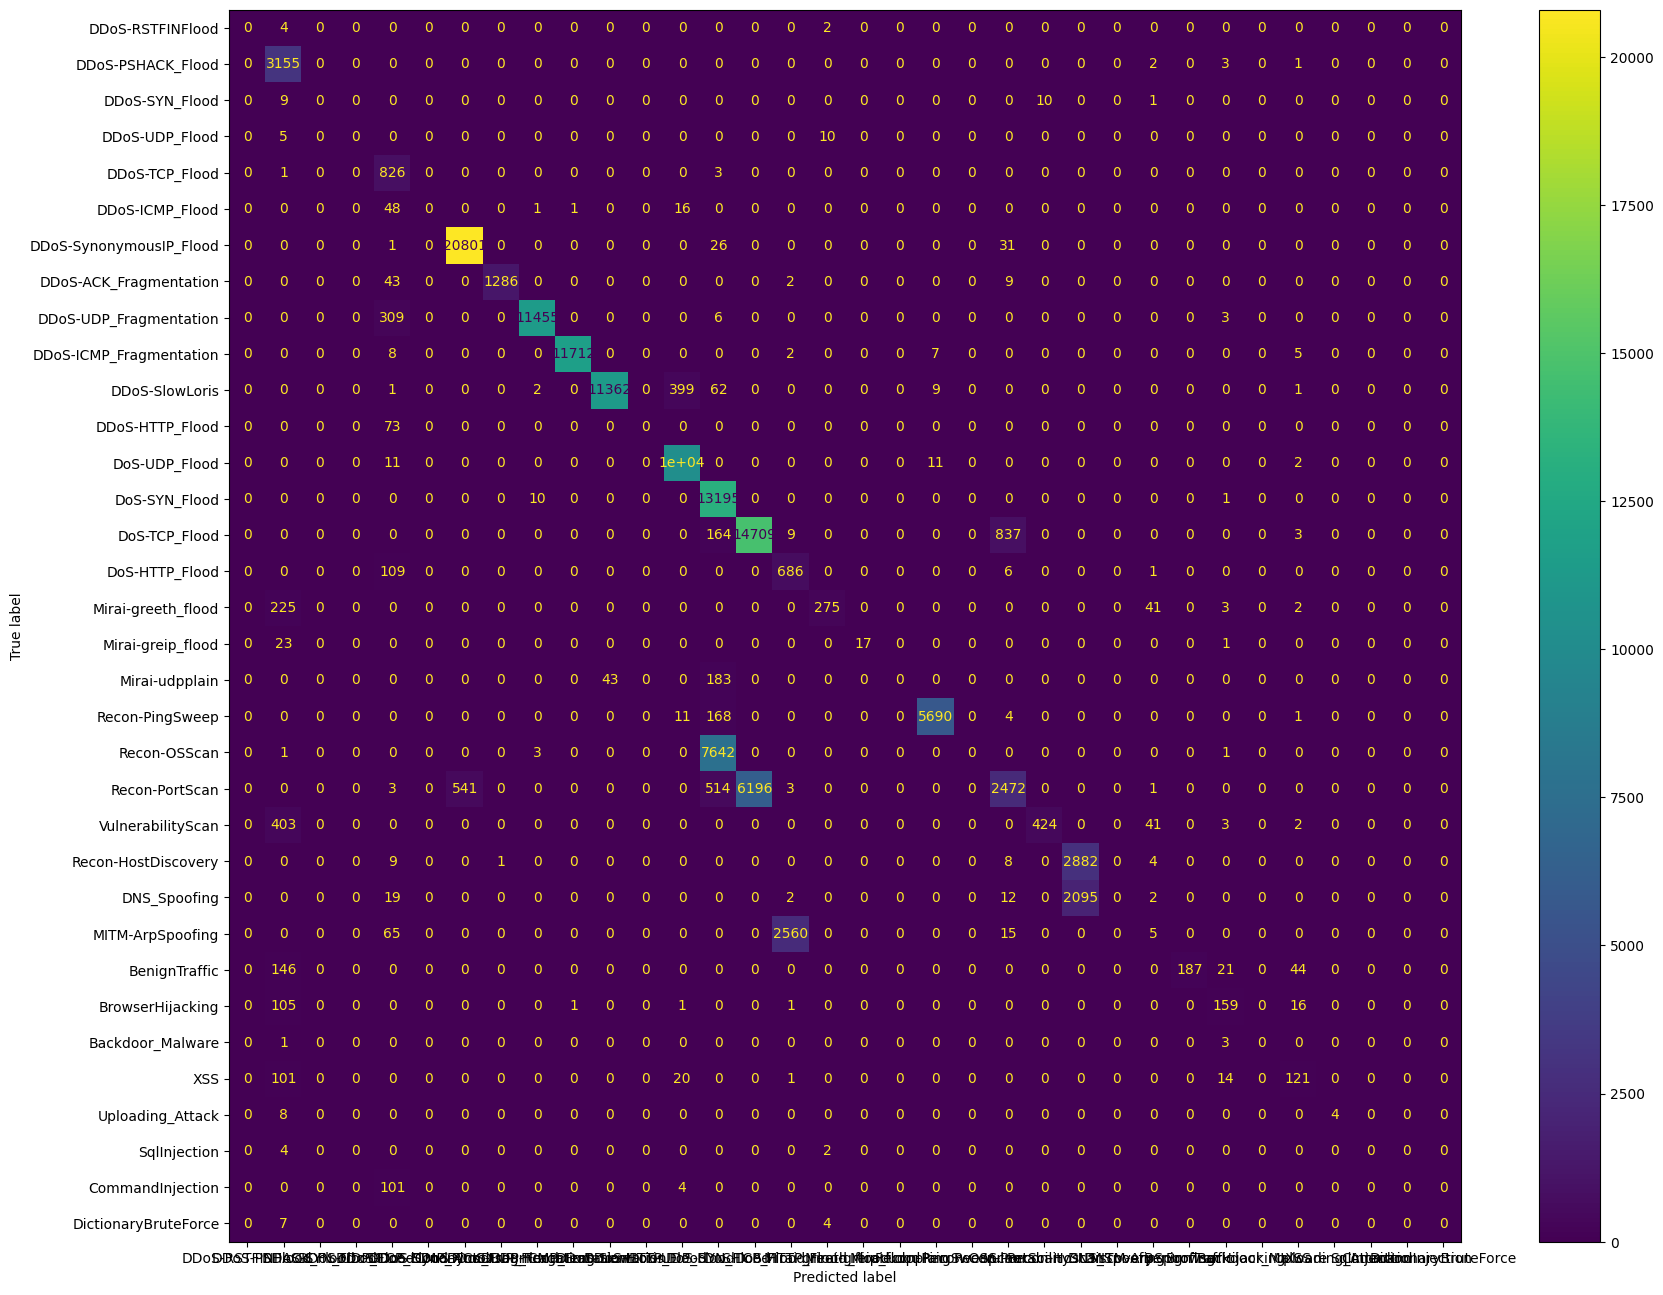

In [73]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=ab_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# CatBoost Classifier Model

In [74]:
cb_model = CatBoostClassifier(verbose=1)

In [75]:
cb_model.fit(x_train, y_train)

Learning rate set to 0.106123
0:	learn: 1.2201500	total: 1.14s	remaining: 19m 1s
1:	learn: 0.9933014	total: 2.16s	remaining: 17m 59s
2:	learn: 0.8667885	total: 3.11s	remaining: 17m 13s
3:	learn: 0.7652501	total: 4.04s	remaining: 16m 45s
4:	learn: 0.6882316	total: 5.07s	remaining: 16m 49s
5:	learn: 0.6254123	total: 6.21s	remaining: 17m 9s
6:	learn: 0.5498075	total: 7.2s	remaining: 17m 1s
7:	learn: 0.5037267	total: 8.21s	remaining: 16m 58s
8:	learn: 0.4508863	total: 9.17s	remaining: 16m 49s
9:	learn: 0.4103136	total: 10.1s	remaining: 16m 42s
10:	learn: 0.3749899	total: 11.1s	remaining: 16m 37s
11:	learn: 0.3443307	total: 12.2s	remaining: 16m 41s
12:	learn: 0.3188515	total: 13.3s	remaining: 16m 50s
13:	learn: 0.2893774	total: 14.4s	remaining: 16m 54s
14:	learn: 0.2681170	total: 15.4s	remaining: 16m 51s
15:	learn: 0.2473915	total: 16.4s	remaining: 16m 49s
16:	learn: 0.2280563	total: 17.5s	remaining: 16m 53s
17:	learn: 0.2122473	total: 18.5s	remaining: 16m 49s
18:	learn: 0.1987749	total: 19

In [76]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

Training Score: 0.9966682276109958
Test Score: 0.9908157991878922


In [77]:
y_pred=cb_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9908157991878922
Precision: 0.7434028666760062
Recall: 0.7057253223911991
F1 Score: 0.7141374192958133


In [78]:
acc_train=format(accuracy_score(cb_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, cb_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,cb_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,cb_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(cb_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, cb_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,cb_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,cb_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['CatBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
5         XGBoosting Classifier           0.991            0.878   
8           CatBoost Classifier           0.997            0.987   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
7           AdaBoost Classifier           0.825            0.509   
1           Logistic Regression           0.789            0.477   
6                     light GBM           0.374            0.123   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
5         0.711           0.728          0.991           0.704         0.690   
8         0.941           0.961          0.991           0.743         0.706   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
7         0.484           0.469          0.825           0.510         0.474   
1         0.418           0.412          0.791           0.513         0.420   
6         0.117           0.093          0.373           0.117         0.117   

  F1_score(test)  
3          0.762  
2          0.761  
5          0.694  
8          0.714  
4          0.708  
0          0.608  
7          0.460  
1          0.417  
6          0.093

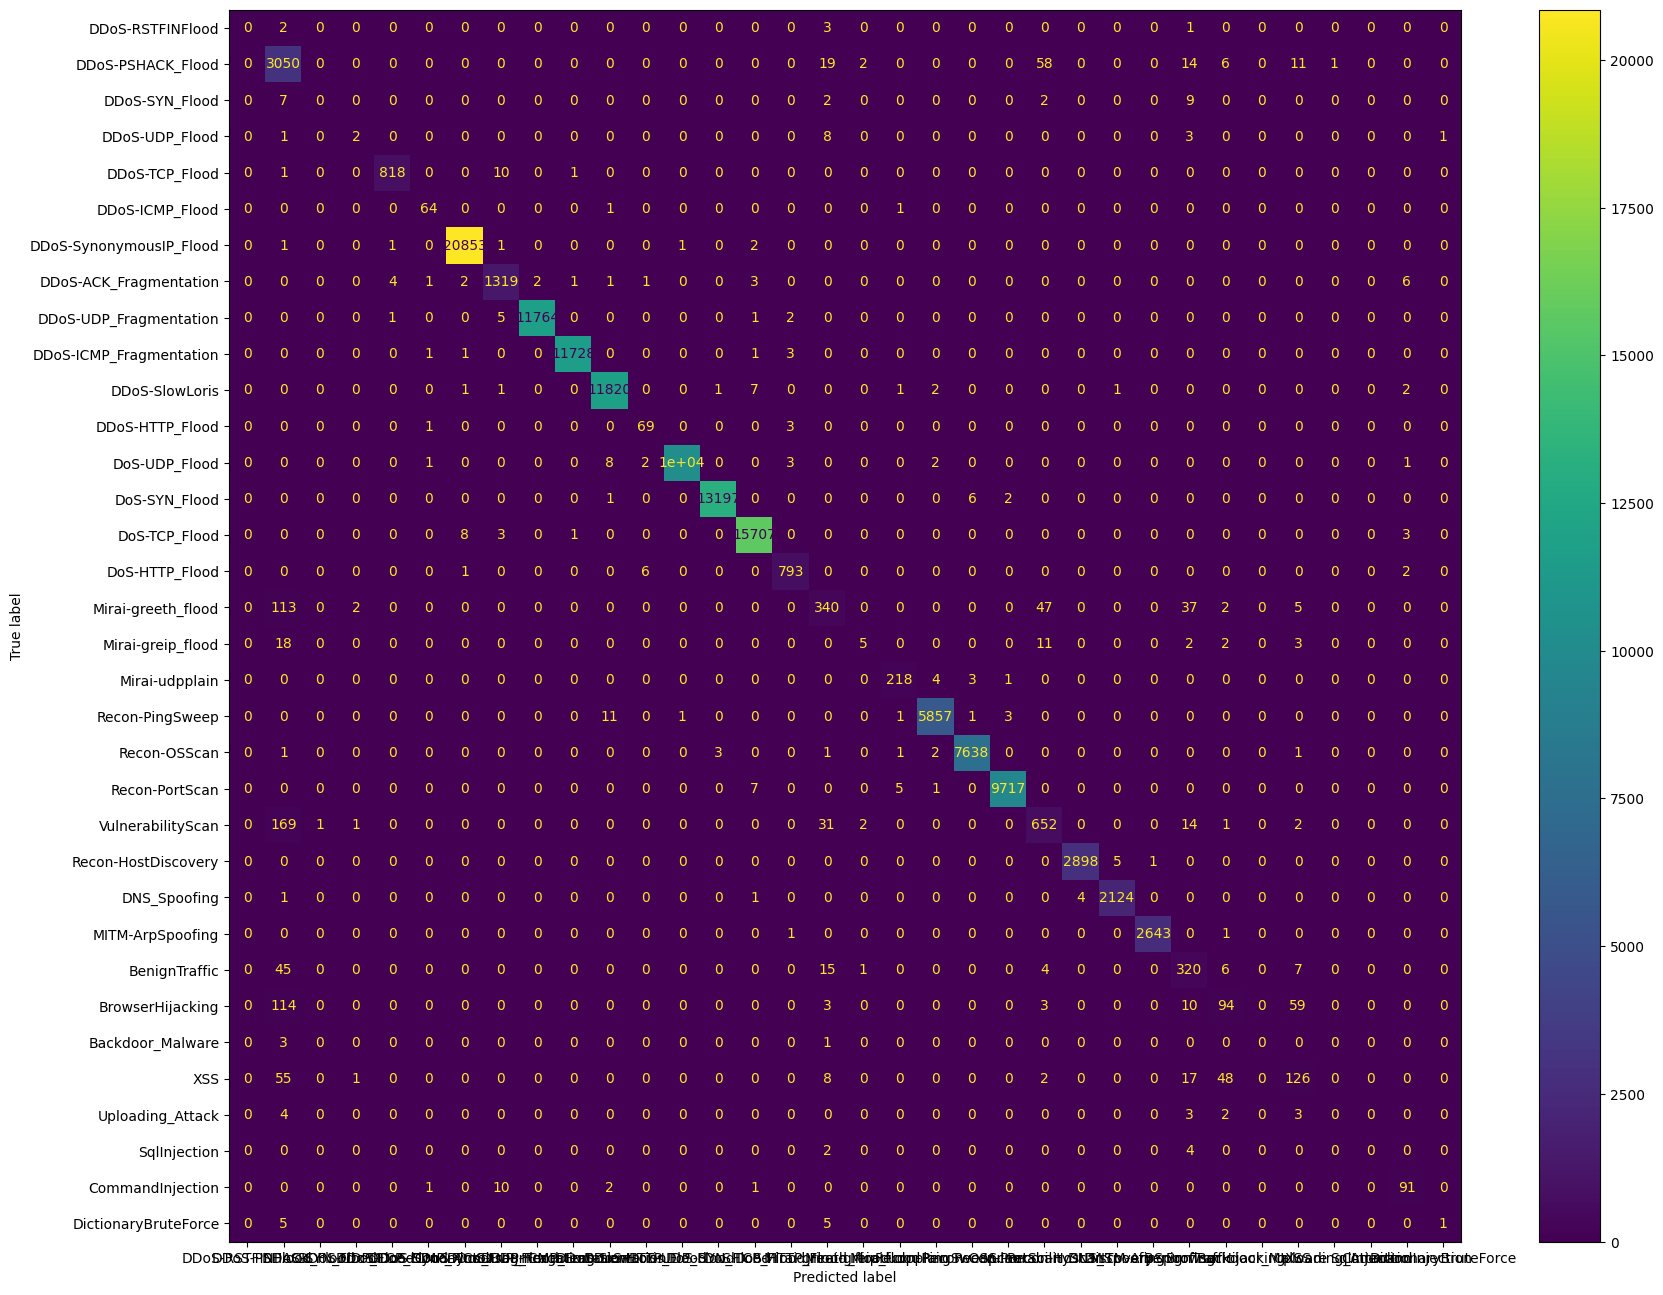

In [79]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=cb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# Naive Baye Model

## Bernoulli Naive Bayes

In [80]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [81]:
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.8078772844631196
Test Score: 0.8090217792543374


In [82]:
y_pred=BNB_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.8090217792543374
Precision: 0.44139428531350877
Recall: 0.4181702132513399
F1 Score: 0.39149312800296393


In [83]:
acc_train=format(accuracy_score(BNB_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, BNB_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,BNB_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,BNB_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(BNB_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, BNB_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,BNB_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,BNB_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
5         XGBoosting Classifier           0.991            0.878   
8           CatBoost Classifier           0.997            0.987   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
7           AdaBoost Classifier           0.825            0.509   
9                   Naive Bayes           0.808            0.450   
1           Logistic Regression           0.789            0.477   
6                     light GBM           0.374            0.123   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
5         0.711           0.728          0.991           0.704         0.690   
8         0.941           0.961          0.991           0.743         0.706   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
7         0.484           0.469          0.825           0.510         0.474   
9         0.417           0.392          0.809           0.441         0.418   
1         0.418           0.412          0.791           0.513         0.420   
6         0.117           0.093          0.373           0.117         0.117   

  F1_score(test)  
3          0.762  
2          0.761  
5          0.694  
8          0.714  
4          0.708  
0          0.608  
7          0.460  
9          0.391  
1          0.417  
6          0.093

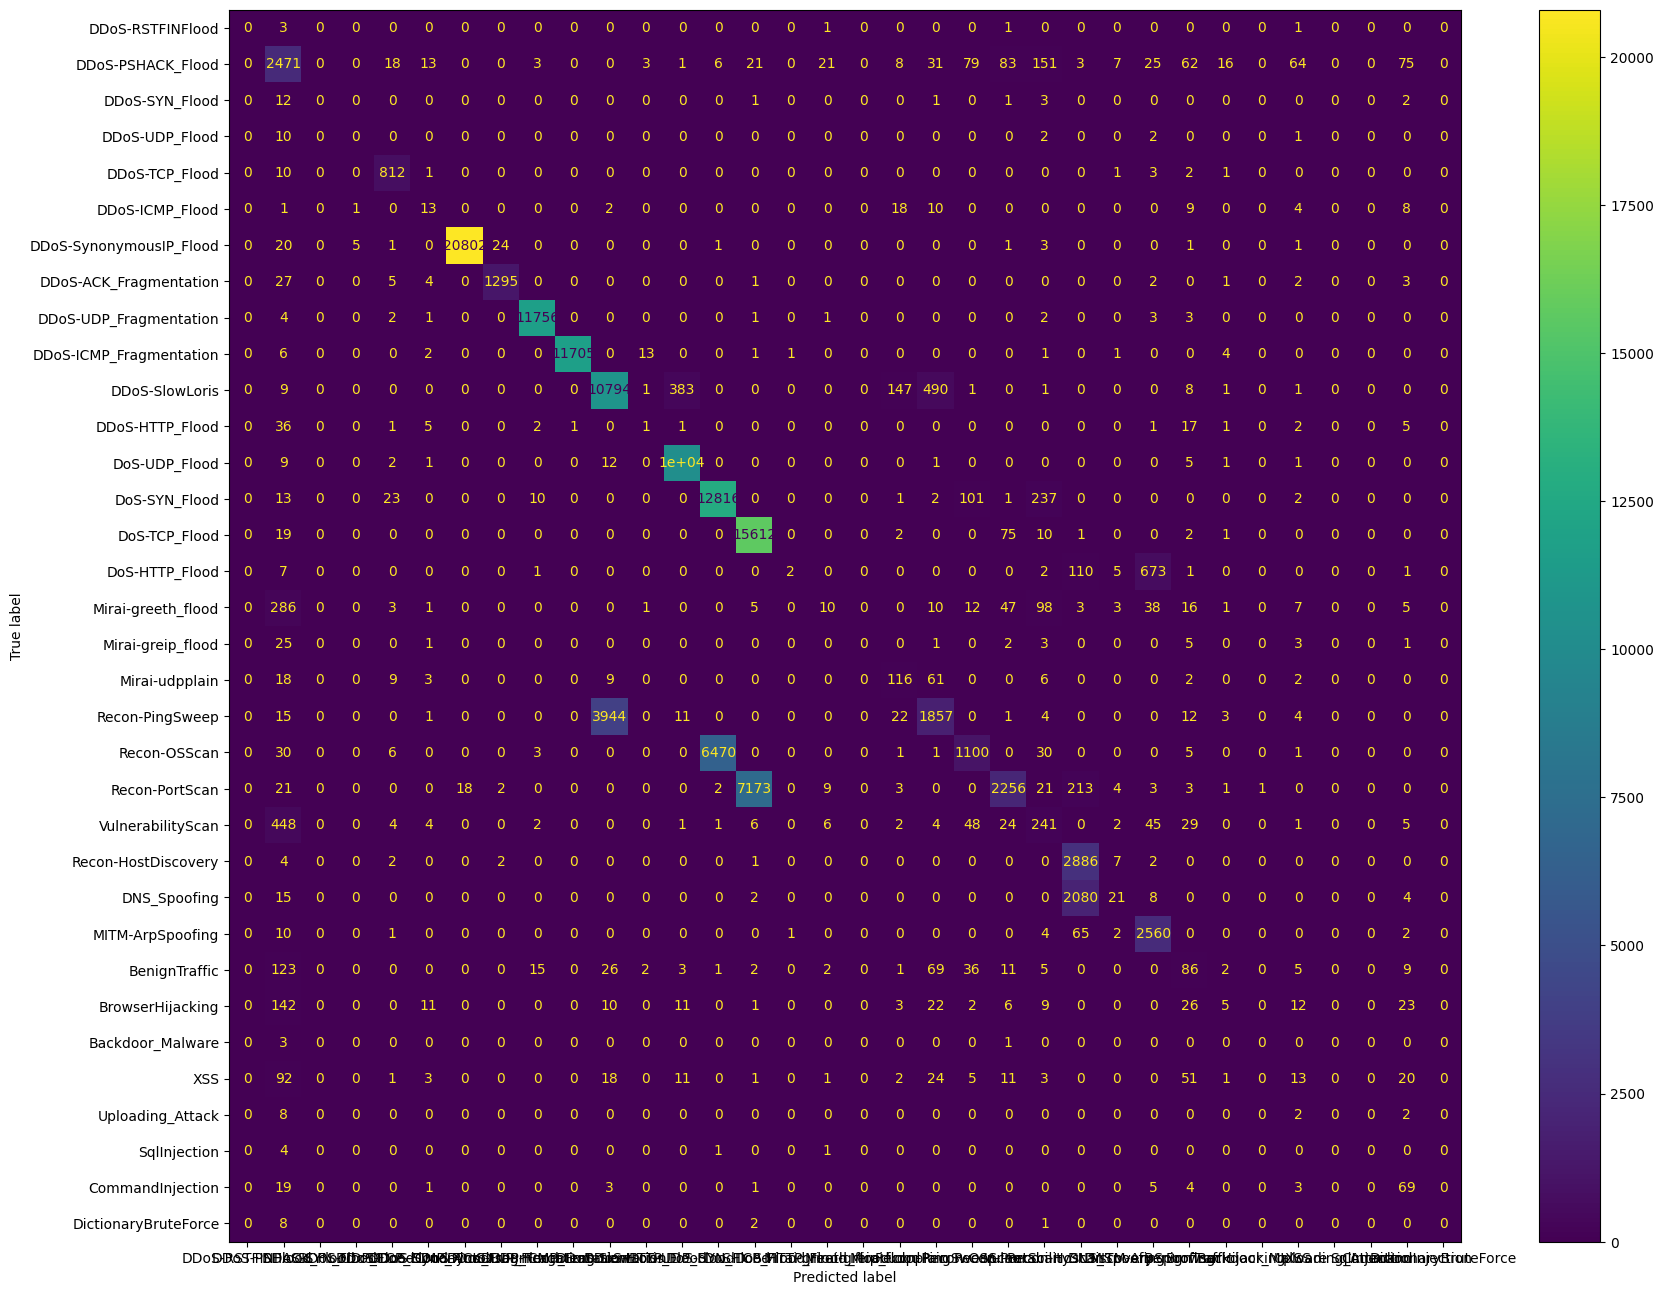

In [84]:
fig, ax = plt.subplots(figsize=(20,16))
cm = confusion_matrix(y_test,y_pred,labels=BNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

## Gaussian Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
# Create a Multinomial Naive Bayes classifier
GNB_model = GaussianNB()
# GNB_model.fit(x_train, y_train)

# Define the number of iterations (you can adjust this based on your dataset)
n_iterations = 10
# Training with a progress bar
with tqdm(total=n_iterations, desc="Training Bernoulli Naive Bayes") as pbar:
    for _ in range(n_iterations):
        GNB_model.fit(x_train, y_train)
        pbar.update(1)

GNB_train, GNB_test = GNB_model.score(x_train , y_train), GNB_model.score(x_test , y_test)

print(f"Training Score: {GNB_train}")
print(f"Test Score: {GNB_test}")

Training Bernoulli Naive Bayes: 100%|██████████| 10/10 [00:01<00:00,  6.25it/s]


Training Score: 0.715309066977168
Test Score: 0.7147139165743817


# Voting Model 

In [86]:
# v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [87]:
# v_clf.fit(x_train, y_train)

In [88]:
# voting_train, voting_test = v_clf.score(x_train , y_train), v_clf.score(x_test , y_test)

# print(f"Training Score: {voting_train}")
# print(f"Test Score: {voting_test}")

# SVM Model

In [89]:
# def objective(trial):
#     kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
#     c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
#     if kernel in ['linear', 'rbf']:
#         classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
#     elif kernel == 'linearSVC':
#         classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
#     elif kernel == 'poly':
#         degree = trial.suggest_int('degree', 2, 10)
#         classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
#     accuracy = classifier_obj.score(x_test, y_test)
#     return accuracy

In [90]:
# study_svm = optuna.create_study(direction='maximize')
# study_svm.optimize(objective, n_trials=10)
# print(study_svm.best_trial)

In [91]:
# if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
#     SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
# elif kernel == 'linearSVC':
#     SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
# elif kernel == 'poly':
#     SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

# SVM_model.fit(x_train, y_train)

In [92]:
# SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

# print(f"Training Score: {SVM_train}")
# print(f"Test Score: {SVM_test}")

In [93]:
# y_pred=SVM_model.predict(x_test)
# print("Accuracy:",accuracy_score(y_test, y_pred.round()))
# print("Precision:",precision_score(y_test, y_pred.round(),average='micro'))
# print("Recall:",recall_score(y_test, y_pred.round(),average='micro'))
# print("F1 Score:",f1_score(y_test, y_pred.round(),average='micro'))

In [94]:
# acc_train=format(accuracy_score(SVM_model.predict(x_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, SVM_model.predict(x_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,SVM_model.predict(x_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,SVM_model.predict(x_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(SVM_model.predict(x_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, SVM_model.predict(x_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,SVM_model.predict(x_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,SVM_model.predict(x_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['Support Vector Machine',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

In [95]:
# fig, ax = plt.subplots(figsize=(20,16))
# cm = confusion_matrix(y_test,y_pred,labels=SVM_model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
# disp.plot(ax=ax)
# plt.show()

In [96]:
# y_pred=clf.predict(x_test)
# print("Accuracy:",accuracy_score(y_test, y_pred.round()))
# print("Precision:",precision_score(y_test, y_pred.round(),average='micro'))
# print("Recall:",recall_score(y_test, y_pred.round(),average='micro'))
# print("F1 Score:",f1_score(y_test, y_pred.round(),average='micro'))

# ANN

In [97]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=34, activation='softmax'))
ann.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [98]:
history1= ann.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
9877/9877 [==============================] - 15s 1ms/step - loss: 0.4908 - accuracy: 0.7950 - val_loss: 0.3843 - val_accuracy: 0.8394
Epoch 2/20
9877/9877 [==============================] - 14s 1ms/step - loss: 0.2632 - accuracy: 0.8969 - val_loss: 0.1494 - val_accuracy: 0.9505
Epoch 3/20
9877/9877 [==============================] - 14s 1ms/step - loss: 0.1244 - accuracy: 0.9565 - val_loss: 0.1189 - val_accuracy: 0.9586
Epoch 4/20
9877/9877 [==============================] - 14s 1ms/step - loss: 0.1036 - accuracy: 0.9652 - val_loss: 0.0916 - val_accuracy: 0.9735
Epoch 5/20
9877/9877 [==============================] - 14s 1ms/step - loss: 0.0921 - accuracy: 0.9714 - val_loss: 0.0823 - val_accuracy: 0.9768
Epoch 6/20
9877/9877 [==============================] - 14s 1ms/step - loss: 0.0865 - accuracy: 0.9737 - val_loss: 0.0854 - val_accuracy: 0.9750
Epoch 7/20
9877/9877 [==============================] - 14s 1ms/step - loss: 0.0863 - accuracy: 0.9730 - val_loss: 0.0866 - val_ac

In [99]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 34)                2210      
                                                                 
Total params: 11682 (45.63 KB)
Trainable params: 11682 (45.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
ann.evaluate(x=x_test, y=y_test, batch_size=8)

16932/16932 [==============================] - 14s 838us/step - loss: 0.0679 - accuracy: 0.9790


[0.06793557852506638, 0.9790180921554565]

In [101]:
print(ann.evaluate(x_train, y_train))

9877/9877 [==============================] - 9s 888us/step - loss: 0.0637 - accuracy: 0.9800
[0.06374955177307129, 0.9799808859825134]


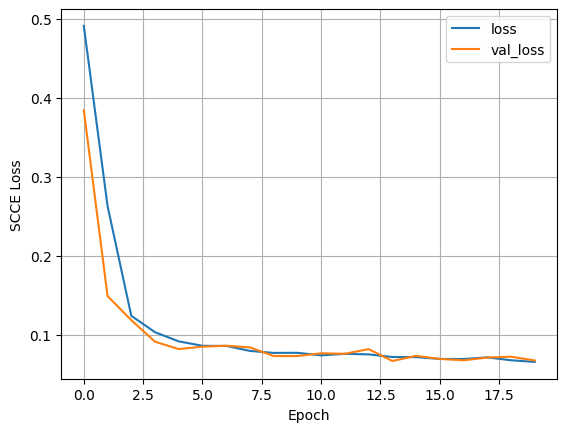

In [102]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

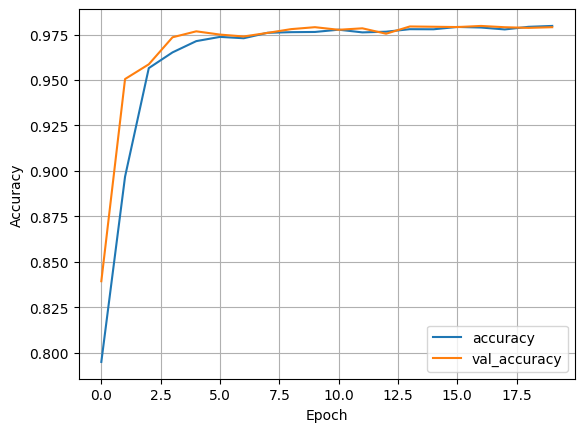

In [103]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

## Training Curve

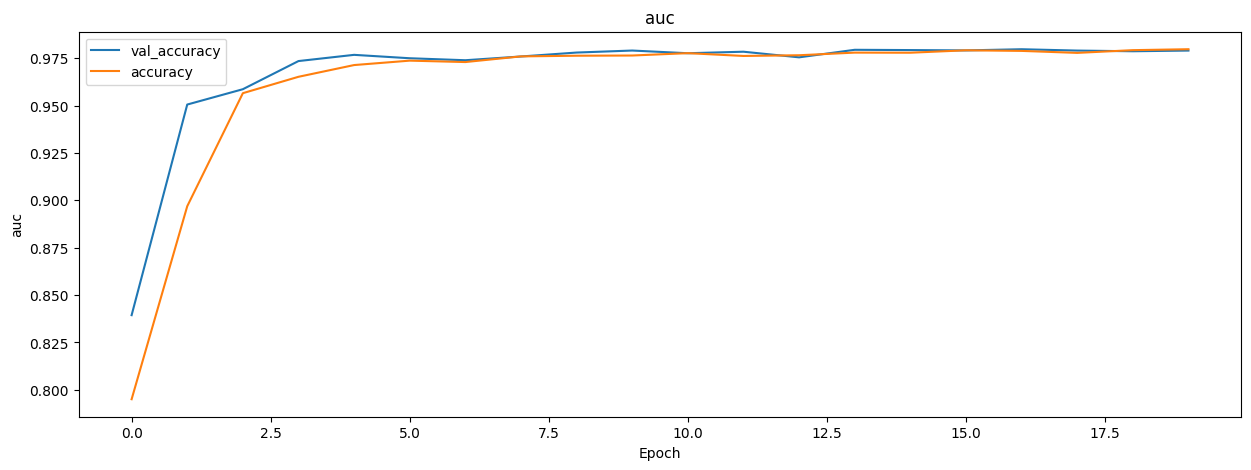

In [104]:
plt.figure(figsize=(15,5))
plt.plot(range(history1.epoch[-1]+1),history1.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history1.epoch[-1]+1),history1.history['accuracy'],label='accuracy')
plt.title('auc'); plt.xlabel('Epoch'); plt.ylabel('auc');plt.legend(); 
plt.show()

## Generate ROC Curve

In [105]:
y_pred = ann.predict(x_test)

print(y_pred.shape)
for i in range (33):
    y_pred=np.delete(y_pred,0,1)
print(y_pred.shape)
y_pred=np.squeeze(y_pred,1)
print(y_pred.shape)

4233/4233 [==============================] - 3s 765us/step
(135450, 34)
(135450, 1)
(135450,)


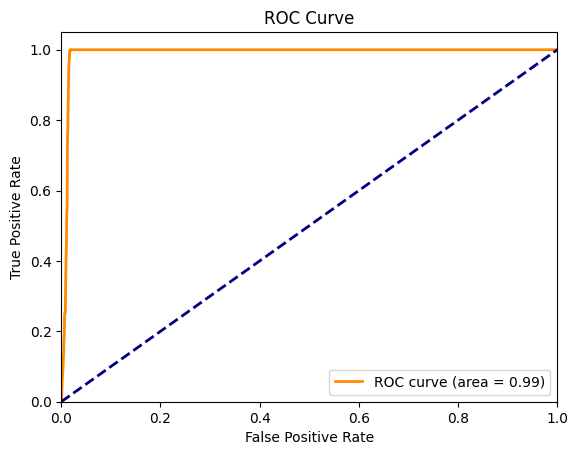

In [106]:
from sklearn.metrics import roc_curve, auc

def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
generate_results(y_test, y_pred)

# Summary

In [120]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["Naive Baye Model", BNB_train, BNB_test], 
#         ["Voting", voting_train, voting_test],
        # ["SVM", SVM_train, SVM_test]
        ]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.979446 │     0.964179 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.78901  │     0.791111 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.999554 │     0.990808 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.99577  │     0.993112 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      0.988796 │     0.987567 │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      0.991394 │     0.990712 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      0.824523 │     0.824762 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      0.373617 │     0.373134 │
├─────────

# Final Evaluation Table for (33+1) Classes

In [117]:
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Model Accuracy(train) Precision(train)  \
3                 Random Forest           0.996            0.984   
2                 Decision Tree           1.000            0.998   
5         XGBoosting Classifier           0.991            0.878   
8           CatBoost Classifier           0.997            0.987   
4  Gradient Boosting Classifier           0.989            0.788   
0           K-Nearest Neighbour           0.979            0.797   
7           AdaBoost Classifier           0.825            0.509   
9                   Naive Bayes           0.808            0.450   
1           Logistic Regression           0.789            0.477   
6                     light GBM           0.374            0.123   

  Recall(train) F1_score(train) Accuracy(test) Precision(test) Recalll(test)  \
3         0.845           0.891          0.993           0.846         0.740   
2         0.993           0.996          0.991           0.761         0.764   
5         0.711           0.728          0.991           0.704         0.690   
8         0.941           0.961          0.991           0.743         0.706   
4         0.738           0.746          0.988           0.735         0.698   
0         0.712           0.724          0.964           0.623         0.603   
7         0.484           0.469          0.825           0.510         0.474   
9         0.417           0.392          0.809           0.441         0.418   
1         0.418           0.412          0.791           0.513         0.420   
6         0.117           0.093          0.373           0.117         0.117   

  F1_score(test)  
3          0.762  
2          0.761  
5          0.694  
8          0.714  
4          0.708  
0          0.608  
7          0.460  
9          0.391  
1          0.417  
6          0.093